# **Project 3**, APS1070 Fall 2022
#### **PCA [14 marks]**
**Deadline: Nov 17, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Anbumanivel Mohan Suganthi
*   **Student number**: 1008696653



### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



In this project we work on a Covid-19 dataset that reports the number of confirmed cases per day and Fashion MNIST.

# Part 1: Getting started [2 Marks]

In [1]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.5]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.5]**

In [2]:
cases_raw.head()

2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
Afghanistan           0           0           0           0           0   
Albania               0           0           0           0           0   
Algeria               0           0           0           0           0   
Andorra               0           0           0           0           0   
Angola                0           0           0           0           0   

             2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  ...  \
Afghanistan           0           0           0           0           0  ...   
Albania               0           0           0           0           0  ...   
Algeria               0           0           0           0           0  ...   
Andorra               0           0           0           0           0  ...   
Angola                0           0           0           0           0  ...   

             2022-01-14  2022-01-15  2022-01-16  2022-01-17  2022-01-18  \
Afghanistan      158639      158678      158717      158826      158974   
Albania          228777      230940      232637      233654      236486   
Algeria          224979      225484      226057      226749      227559   
Andorra           29888       29888       29888       29888       29888   
Angola            93302       93524       93694       93974       94275   

             2022-01-19  2022-01-20  2022-01-21  2022-01-22  2022-01-23  
Afghanistan      159070      159303      159516      159548      159649  
Albania          239129      241512      244182      246412      248070  
Algeria          228918      230470      232325      234536      236670  
Andorra           29888       32201       33025       33025       33025  
Angola            94779       95220       95676       95902       96582  

[5 rows x 733 columns]

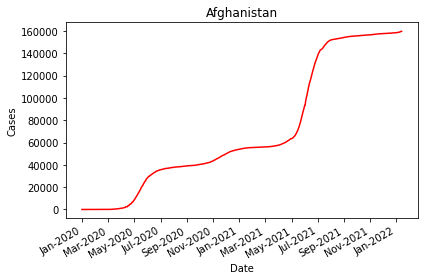

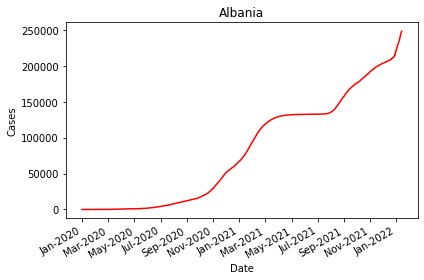

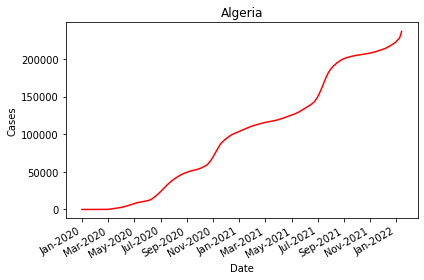

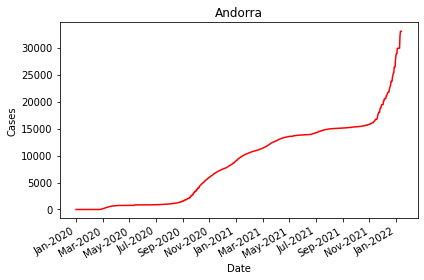

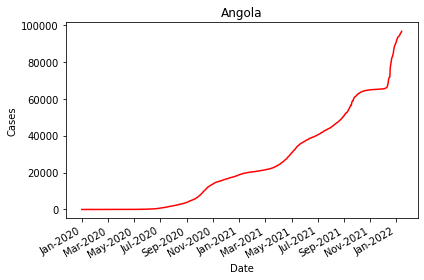

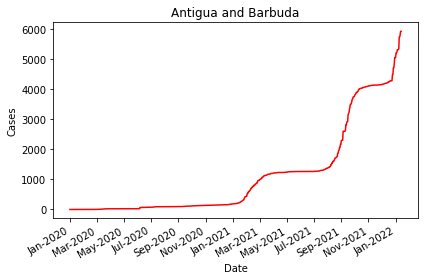

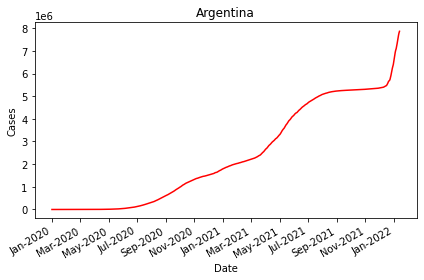

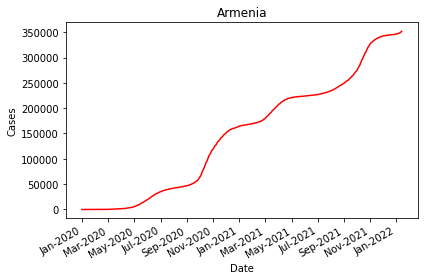

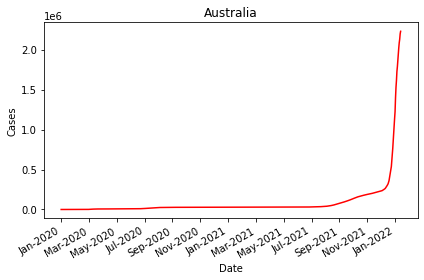

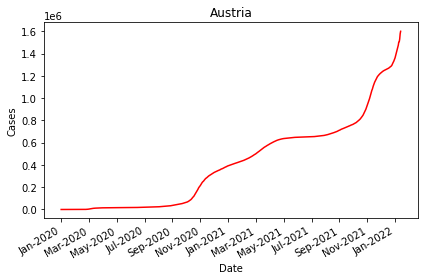

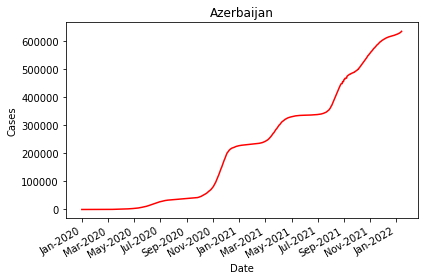

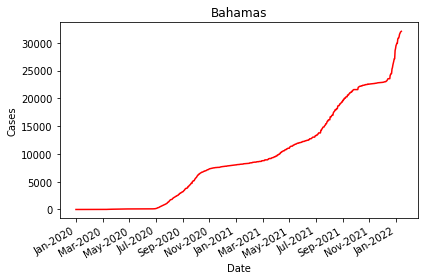

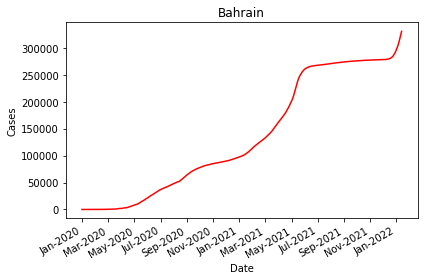

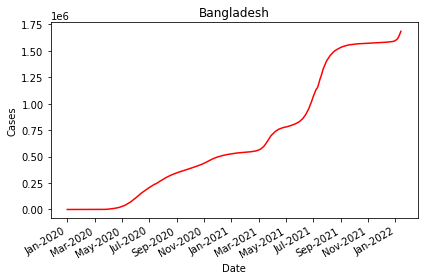

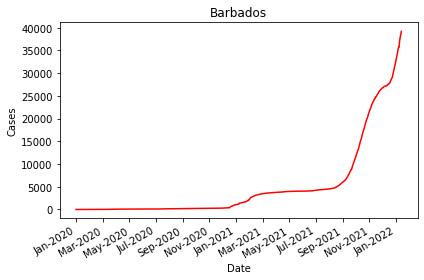

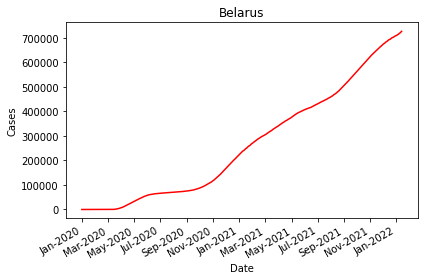

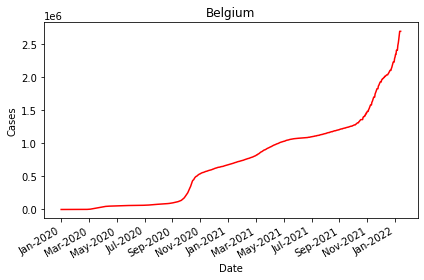

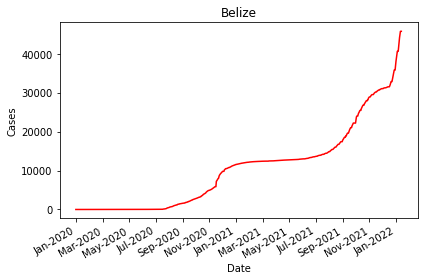

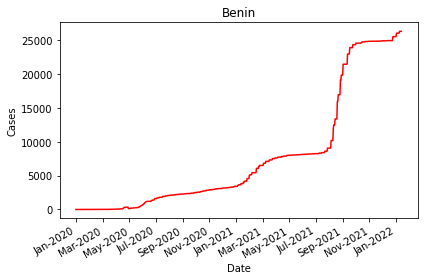

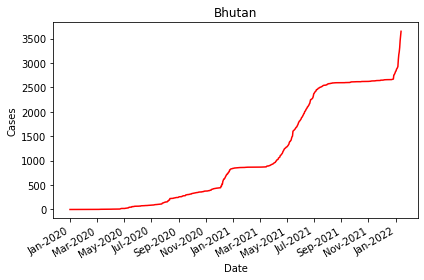

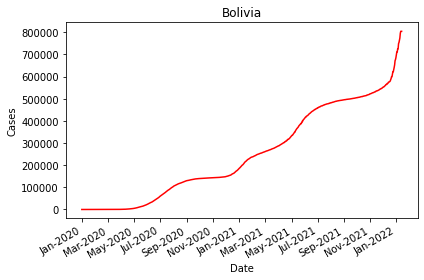

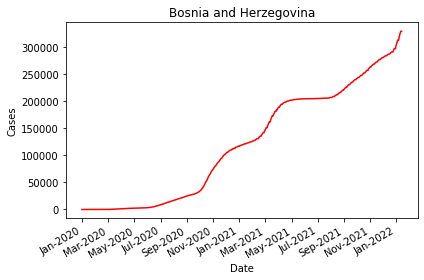

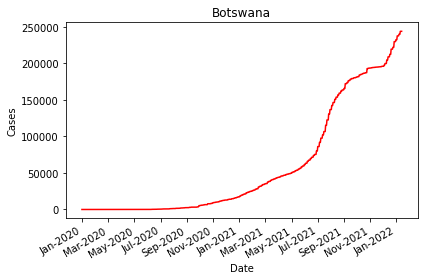

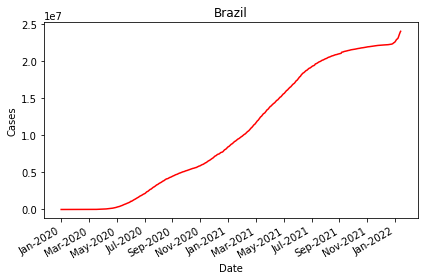

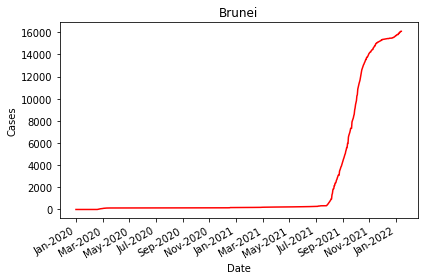

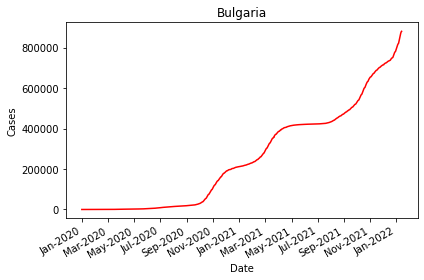

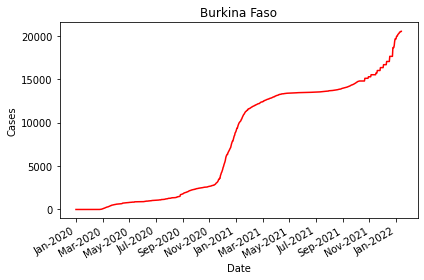

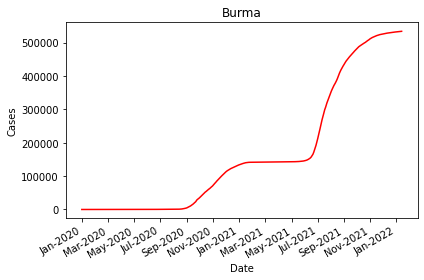

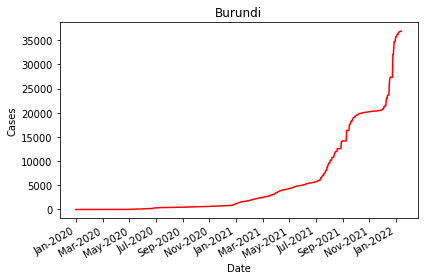

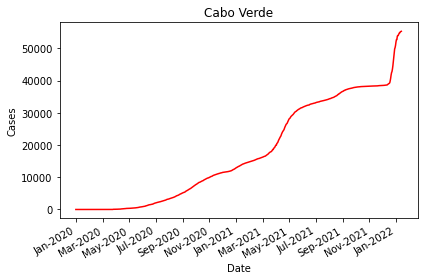

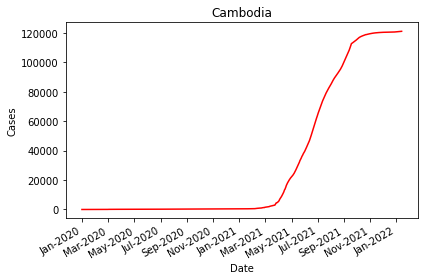

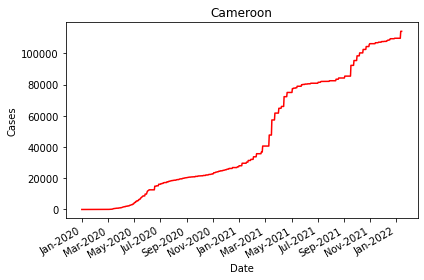

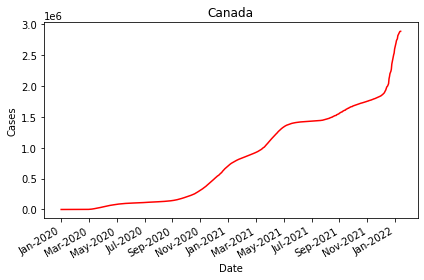

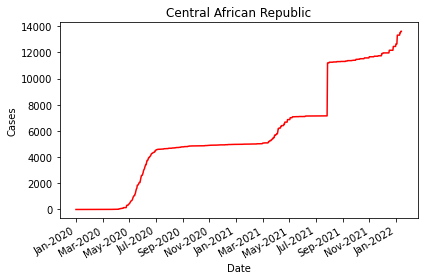

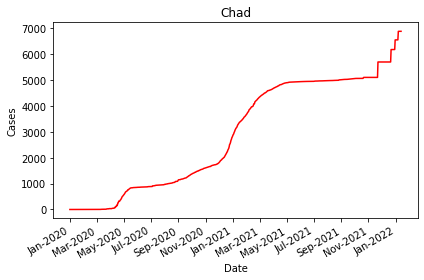

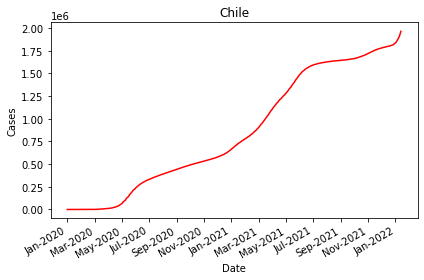

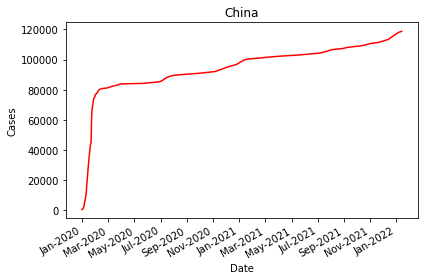

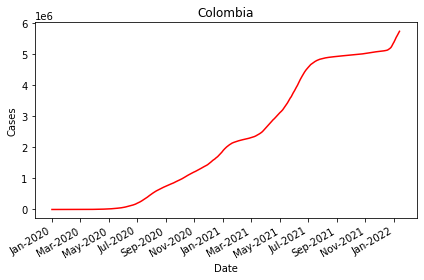

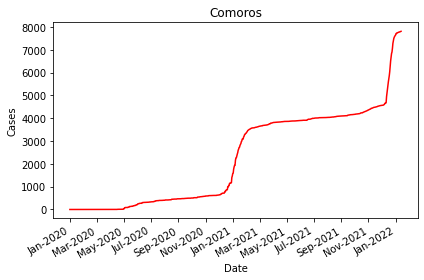

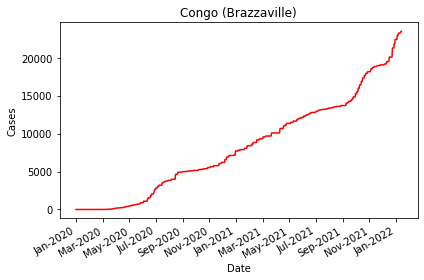

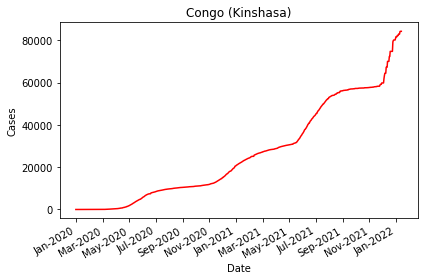

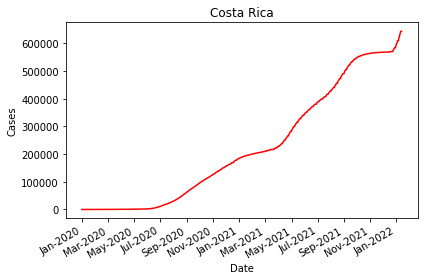

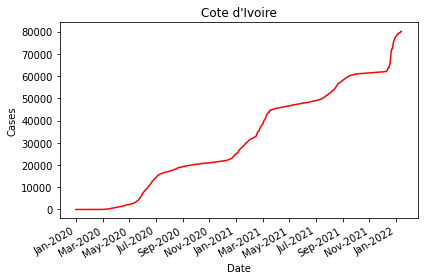

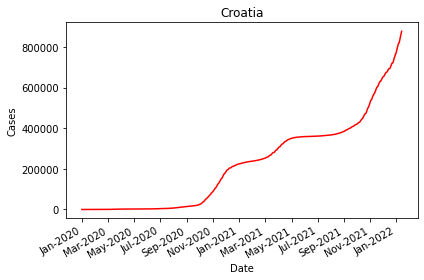

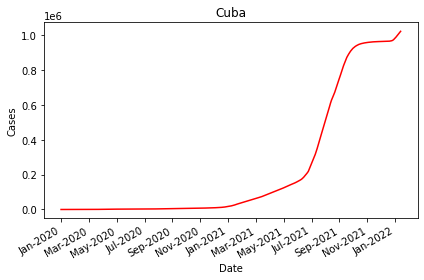

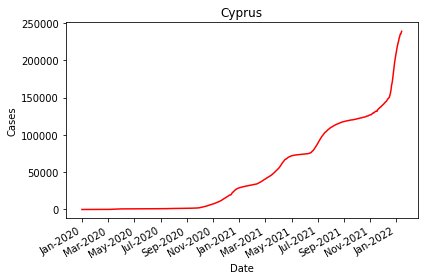

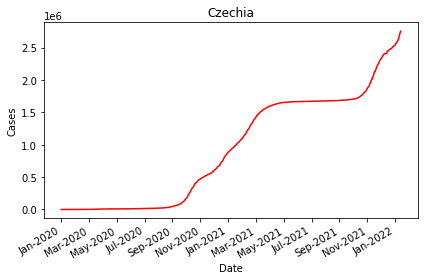

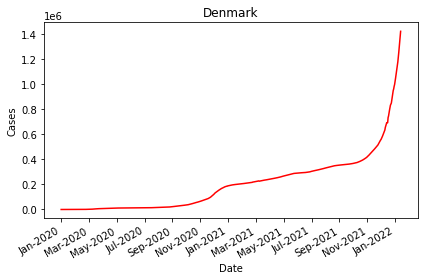

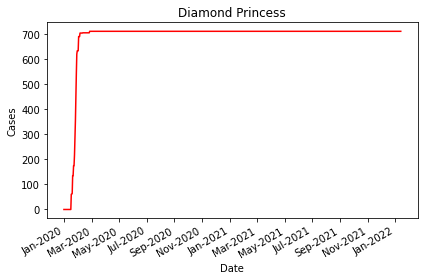

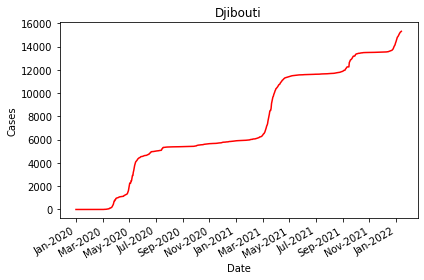

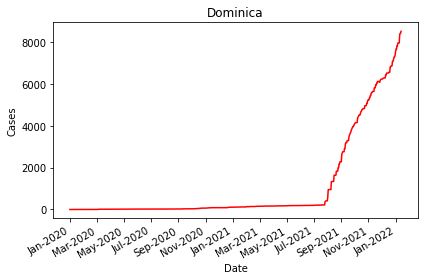

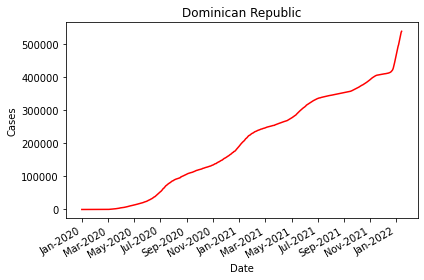

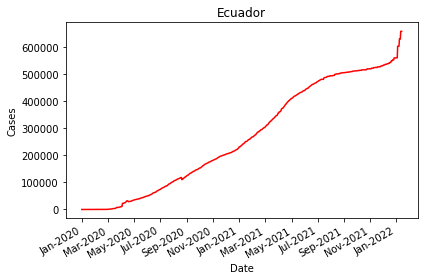

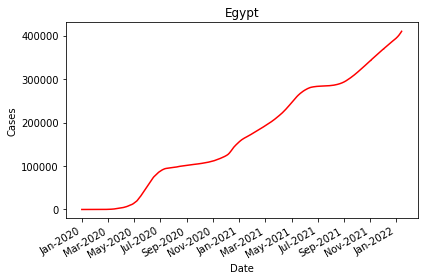

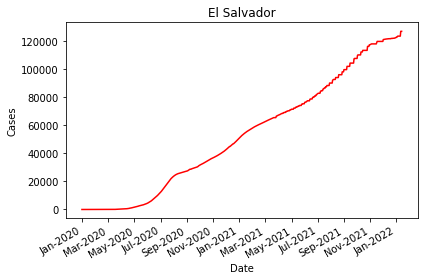

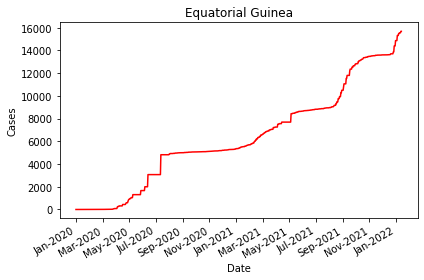

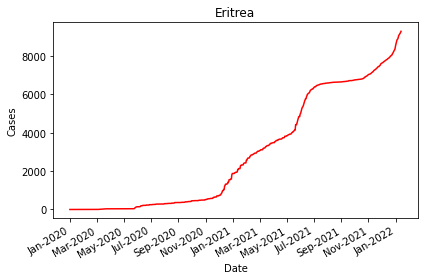

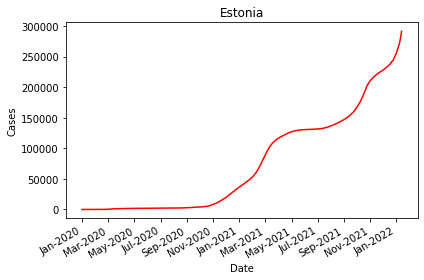

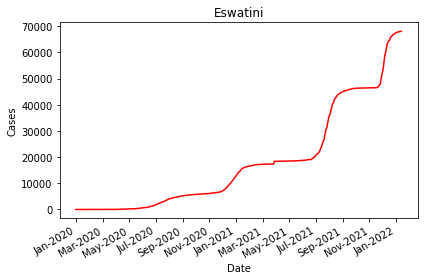

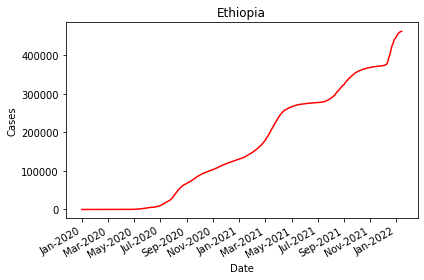

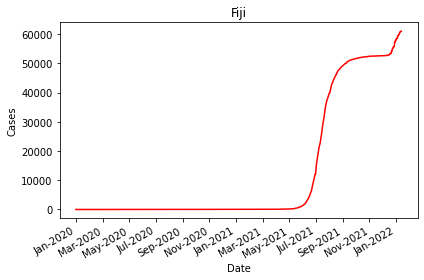

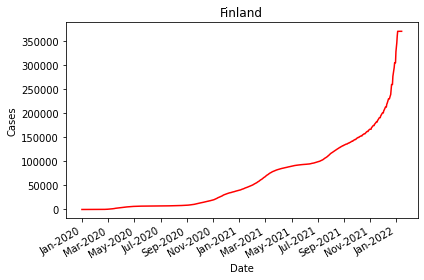

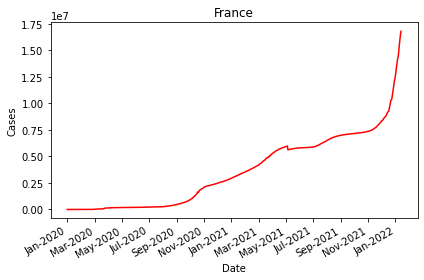

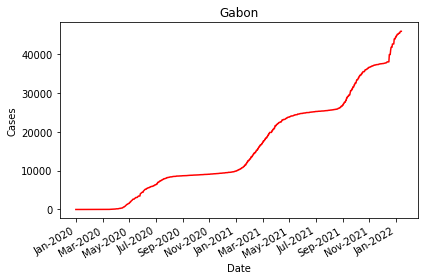

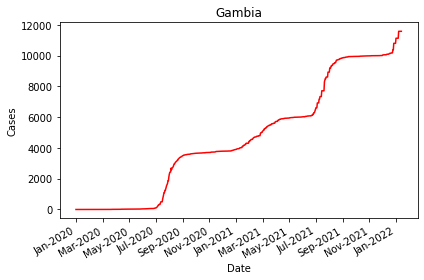

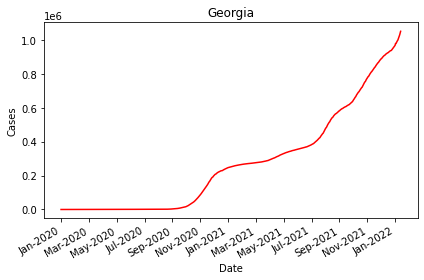

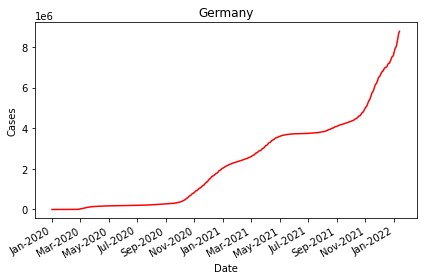

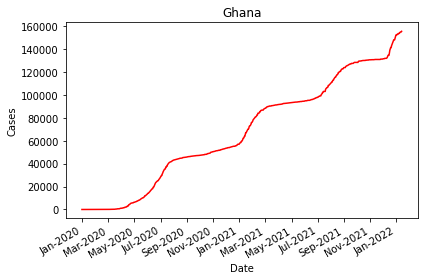

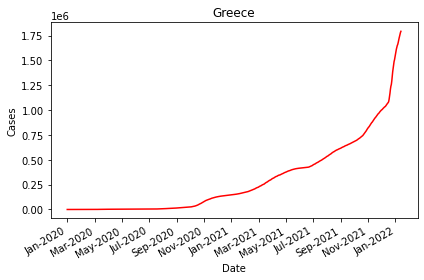

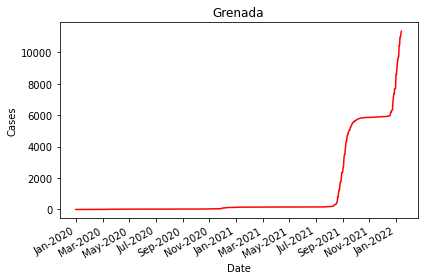

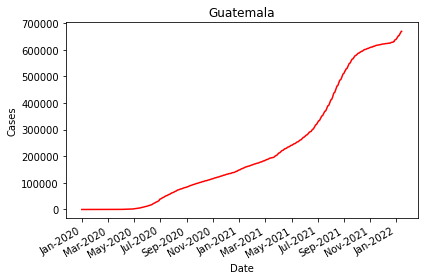

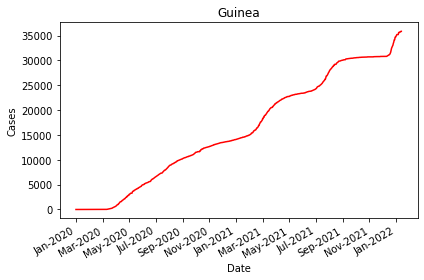

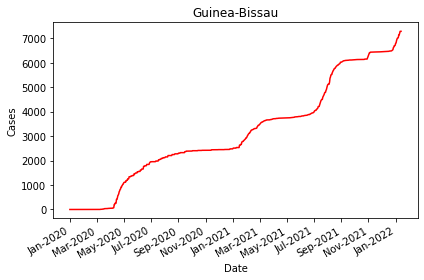

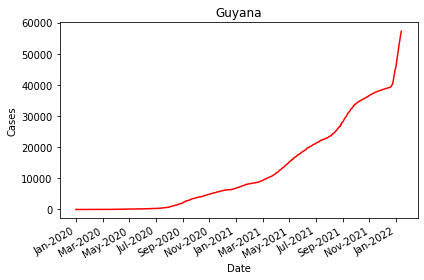

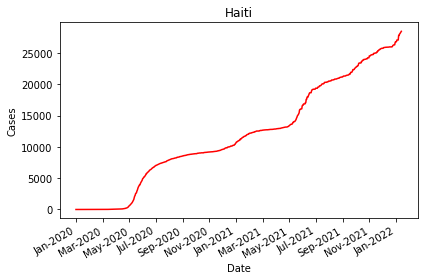

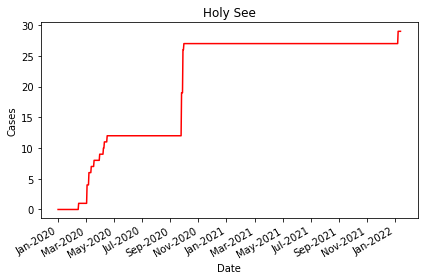

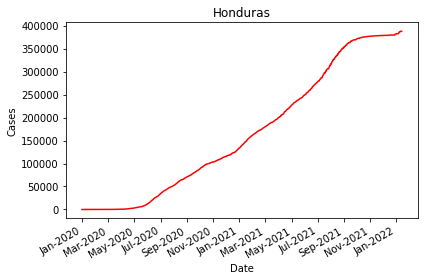

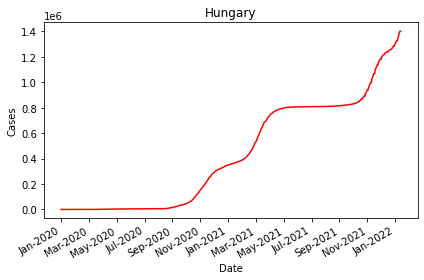

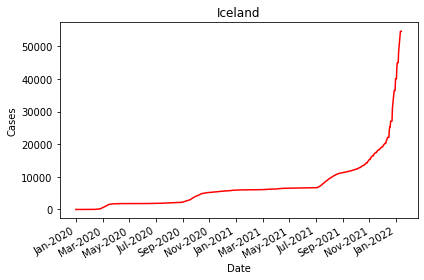

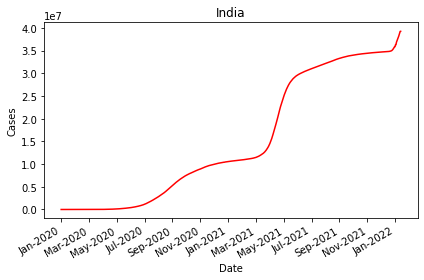

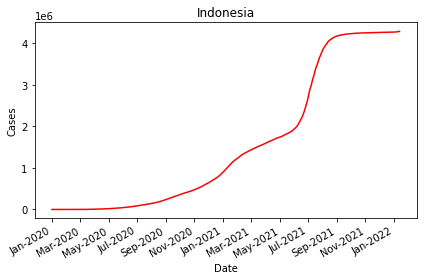

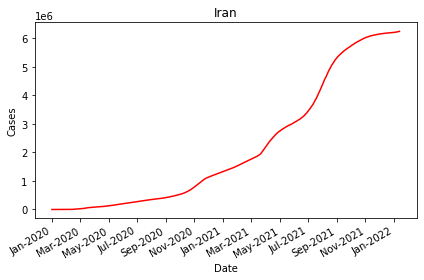

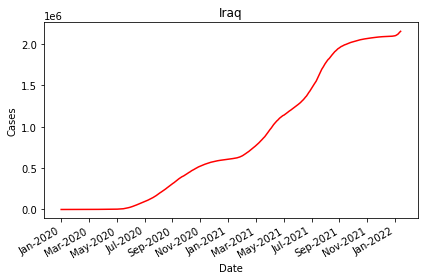

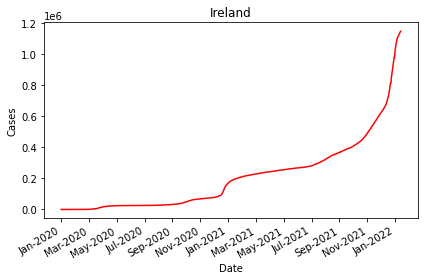

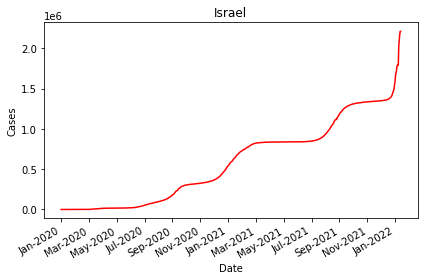

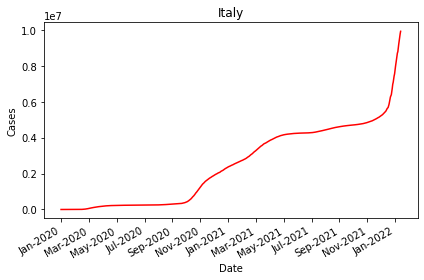

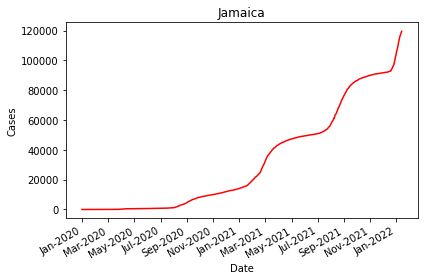

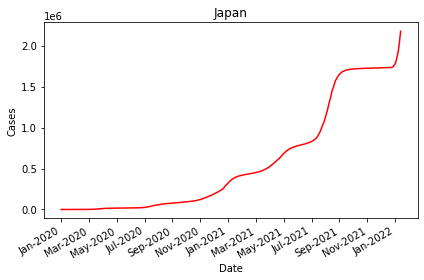

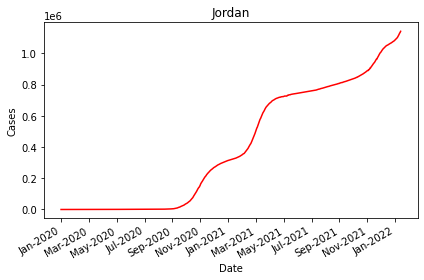

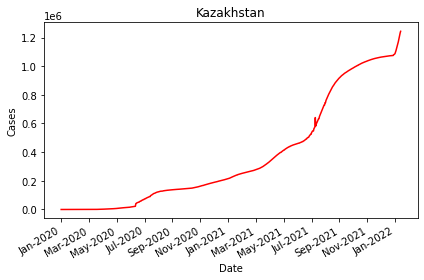

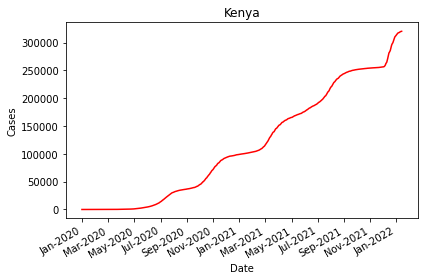

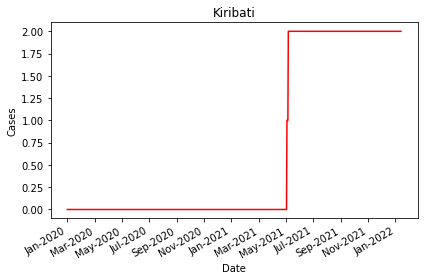

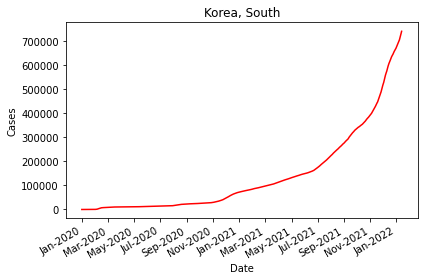

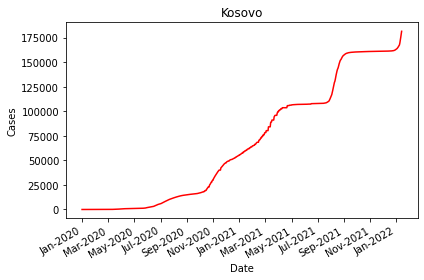

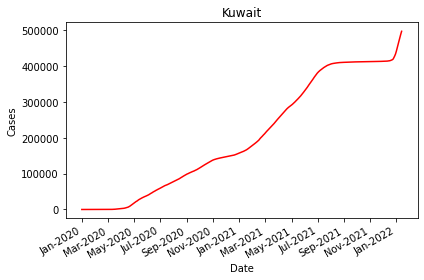

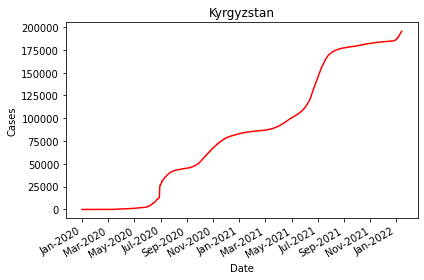

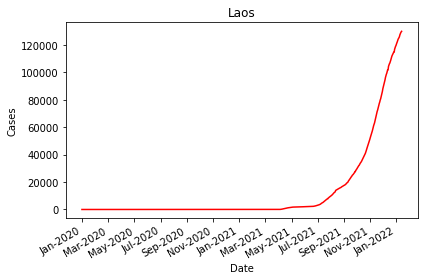

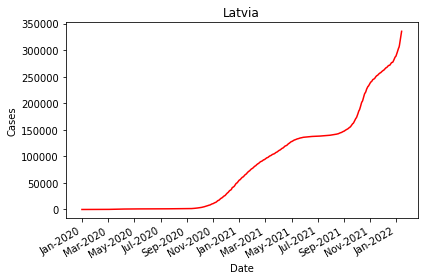

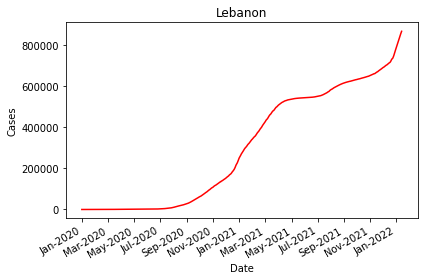

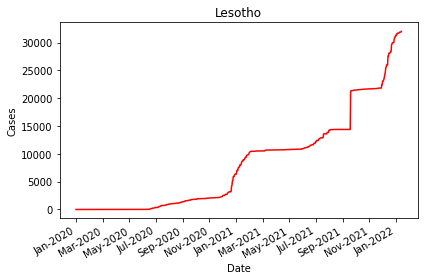

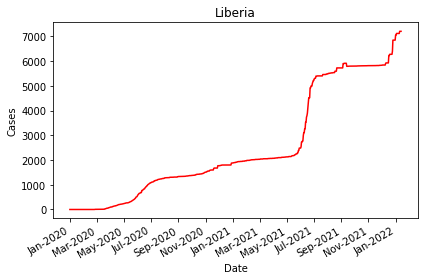

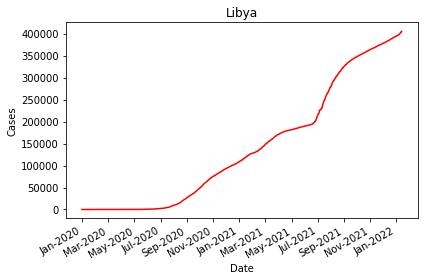

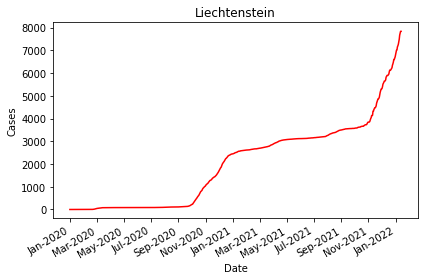

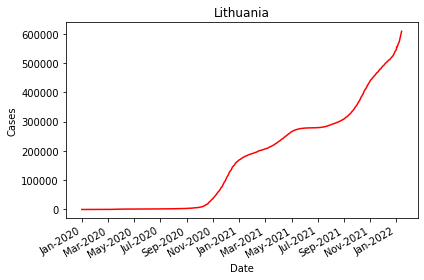

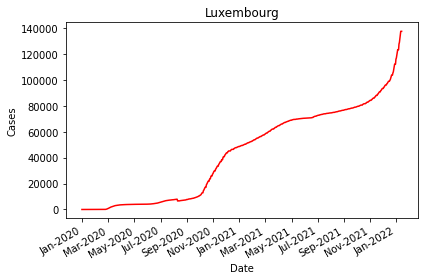

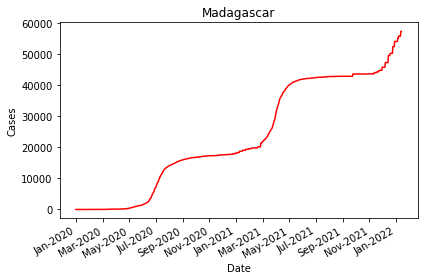

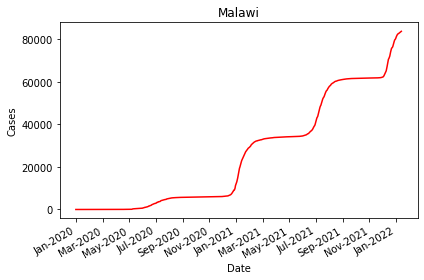

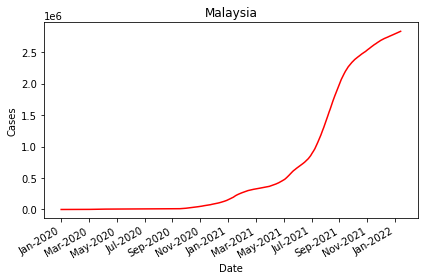

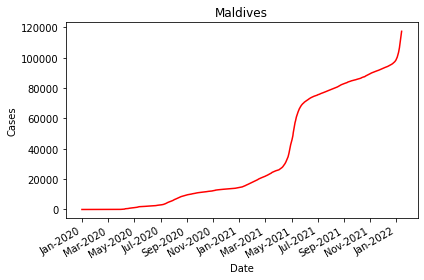

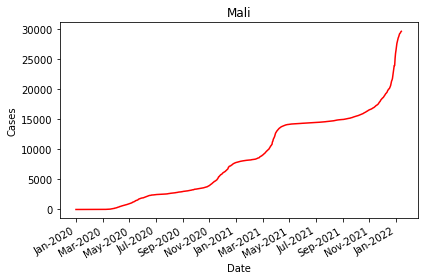

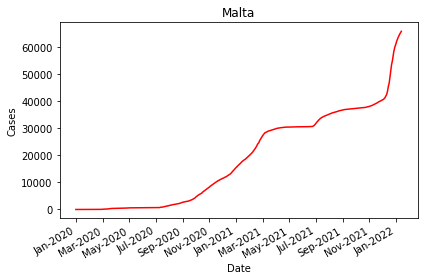

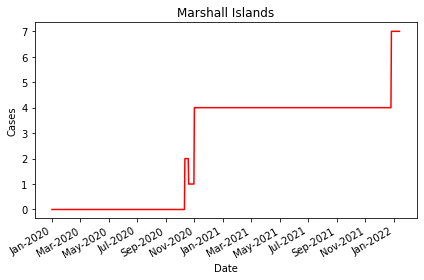

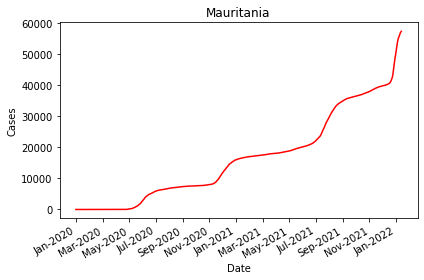

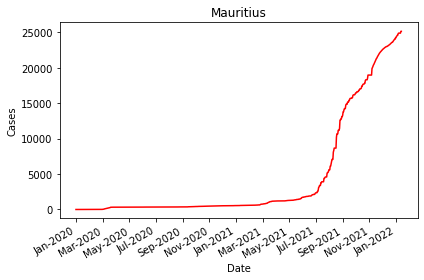

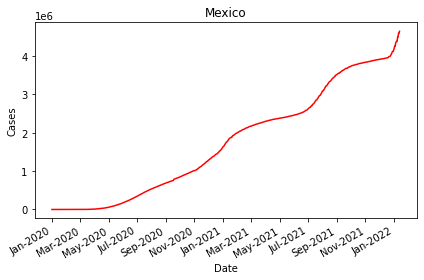

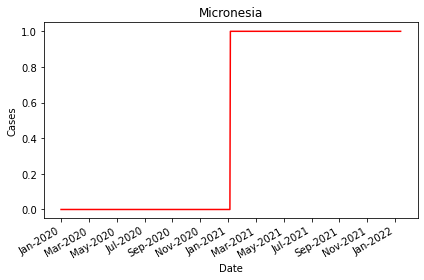

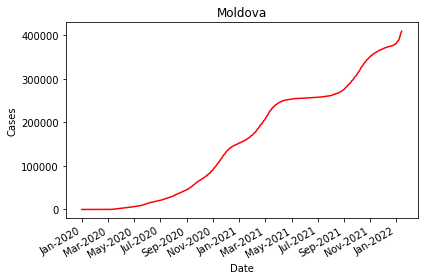

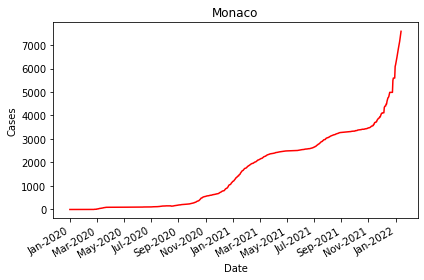

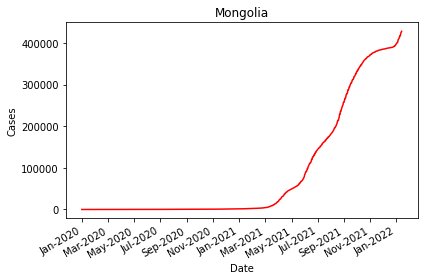

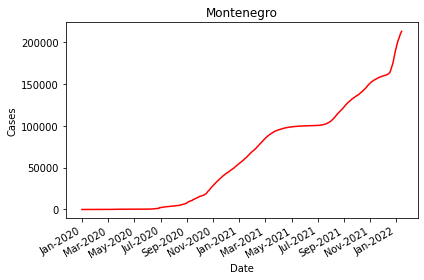

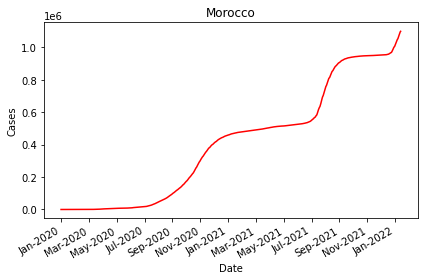

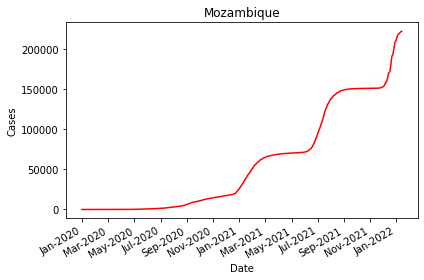

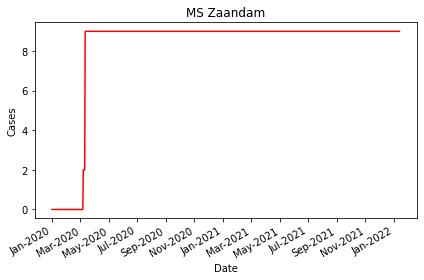

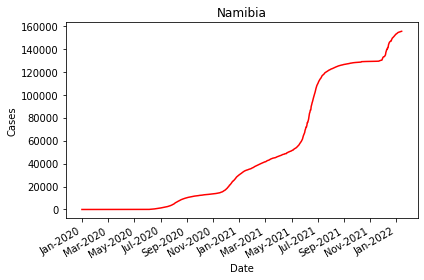

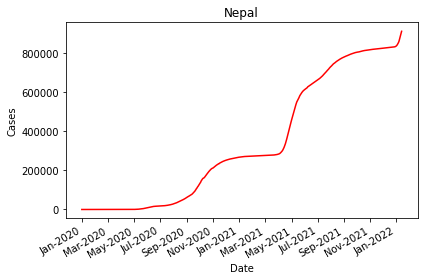

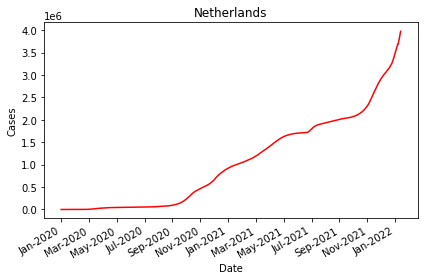

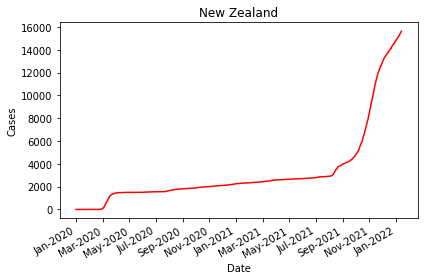

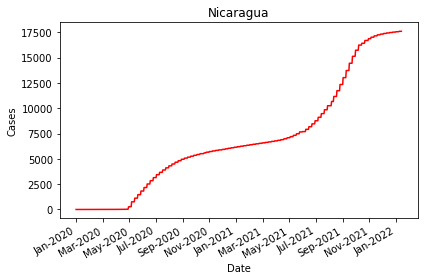

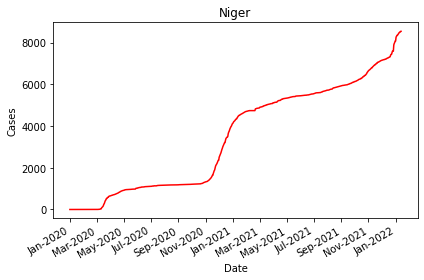

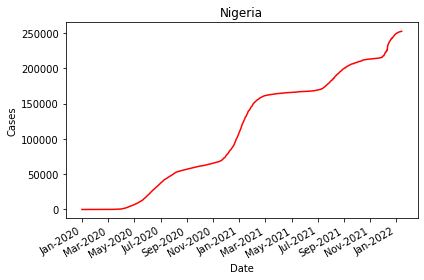

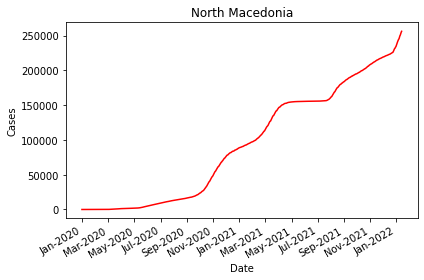

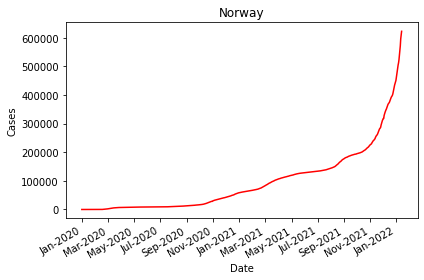

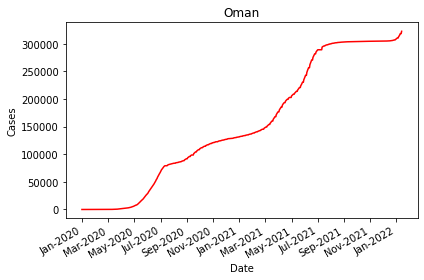

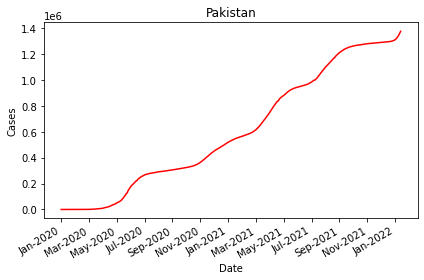

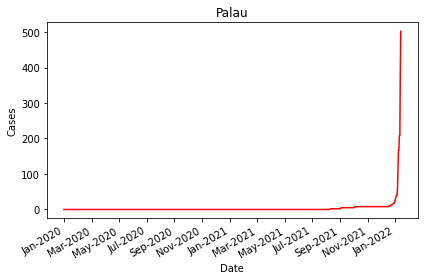

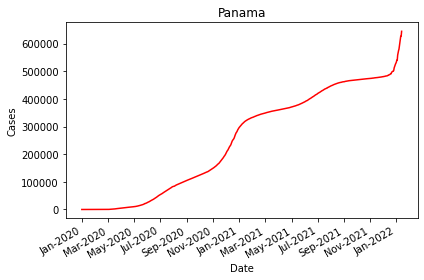

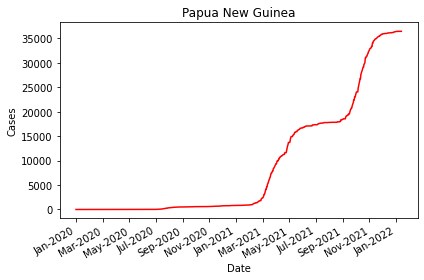

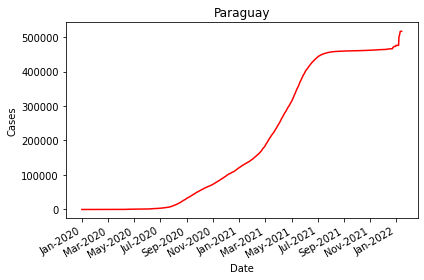

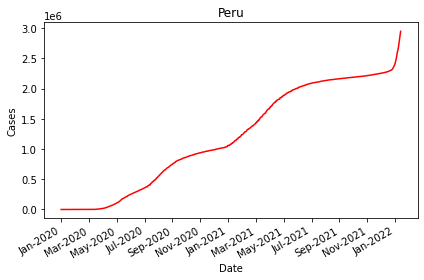

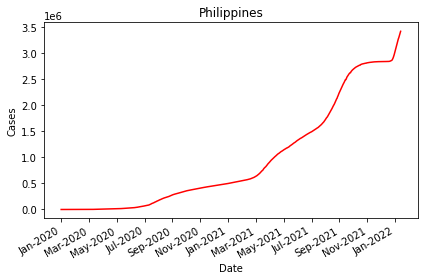

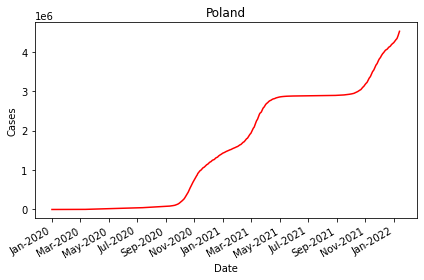

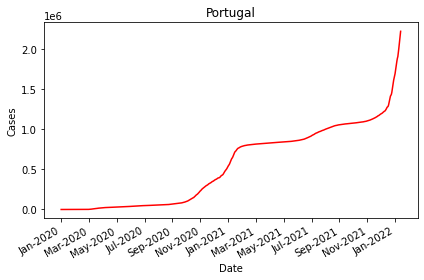

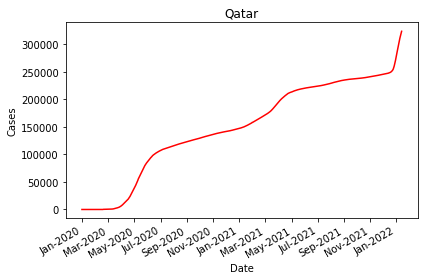

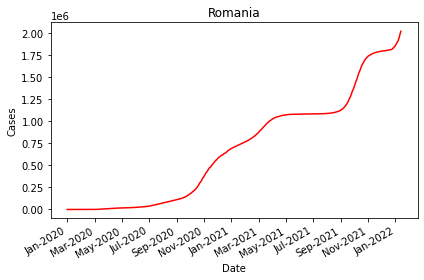

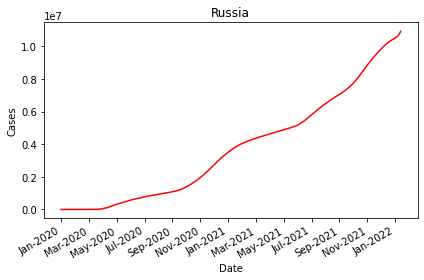

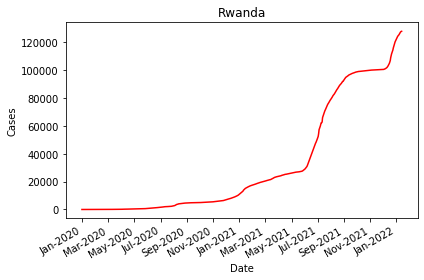

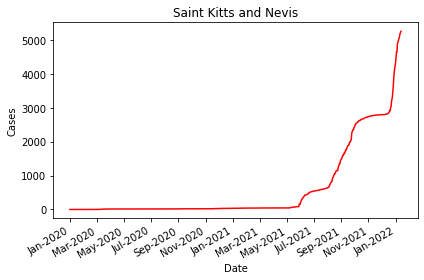

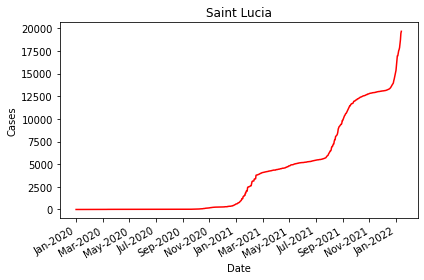

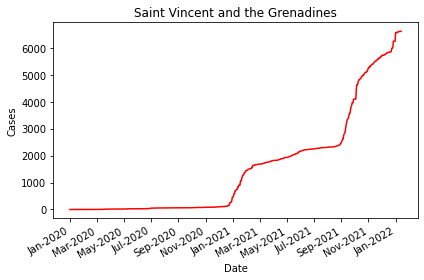

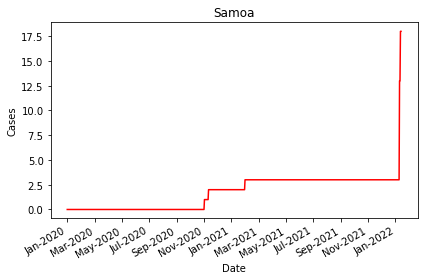

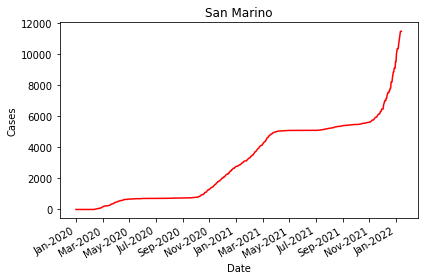

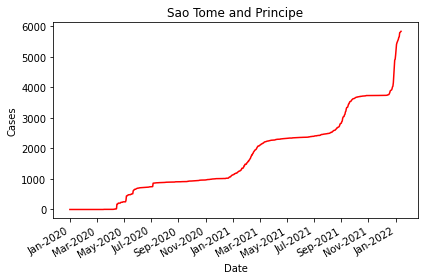

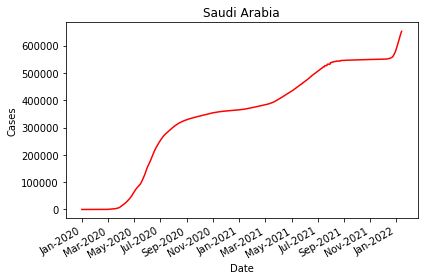

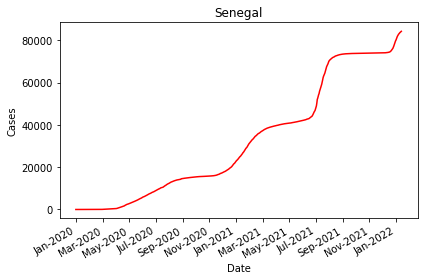

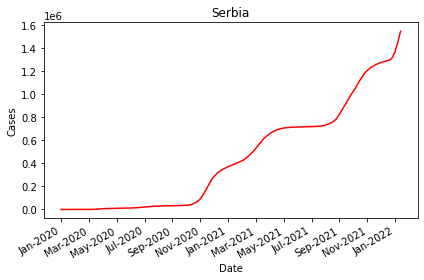

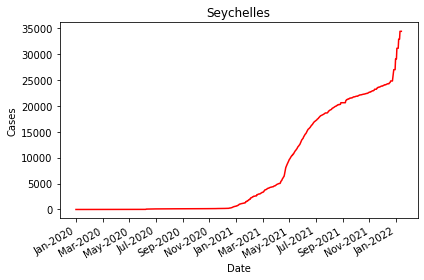

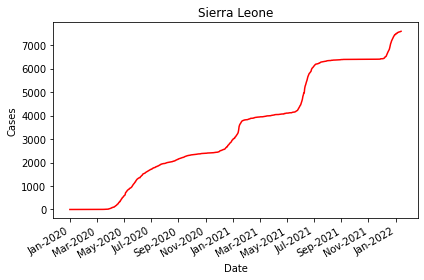

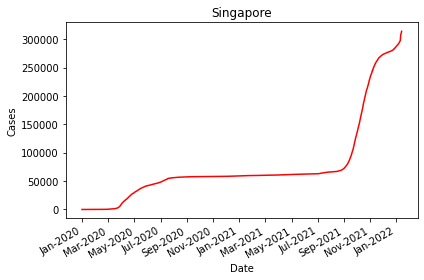

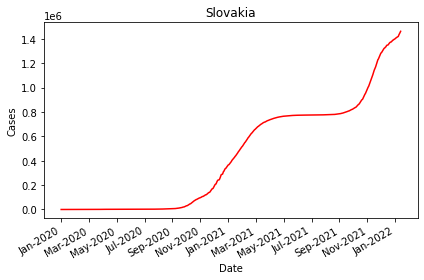

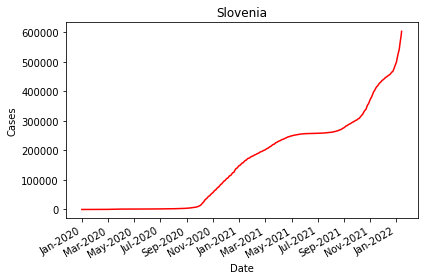

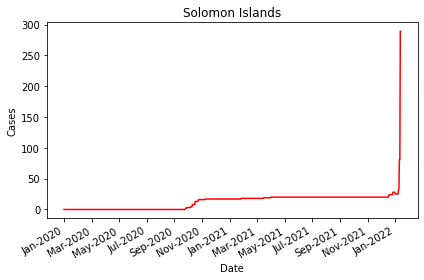

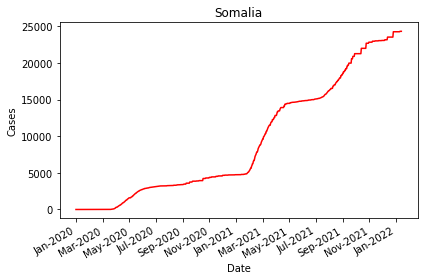

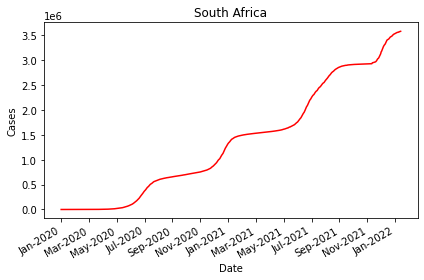

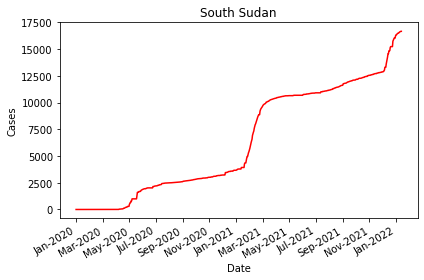

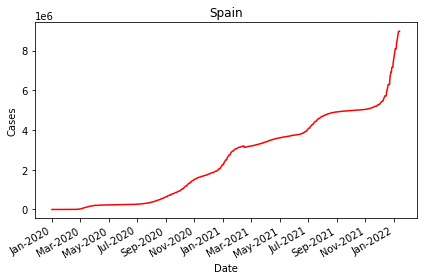

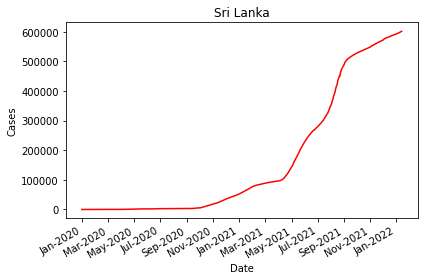

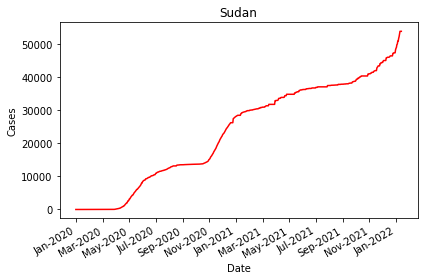

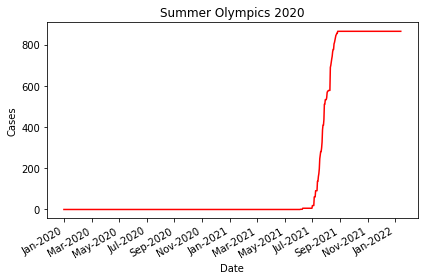

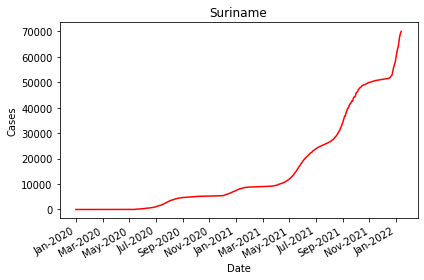

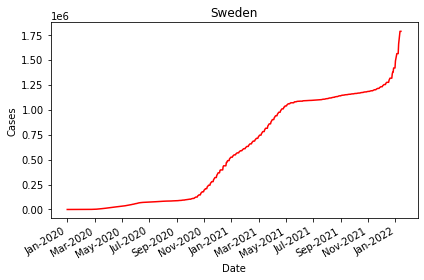

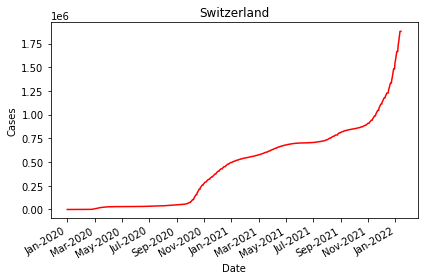

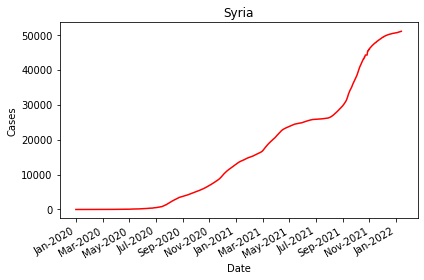

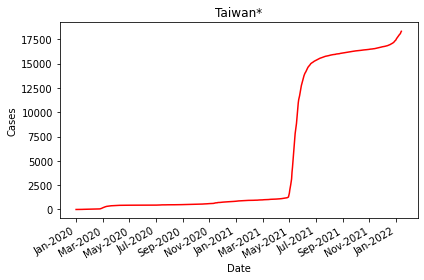

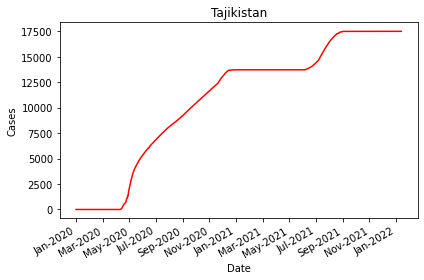

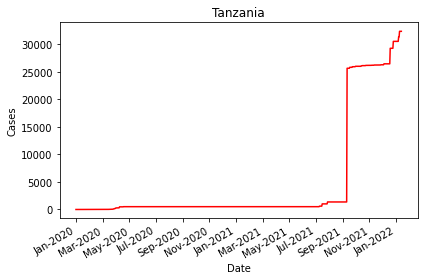

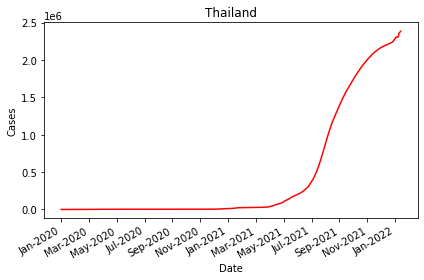

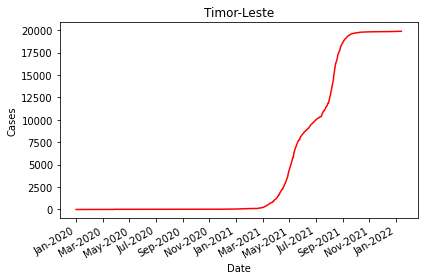

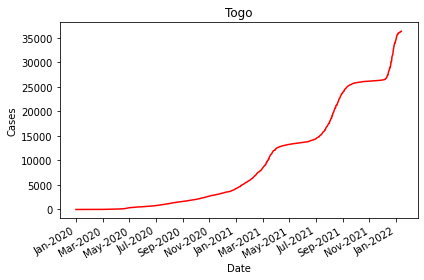

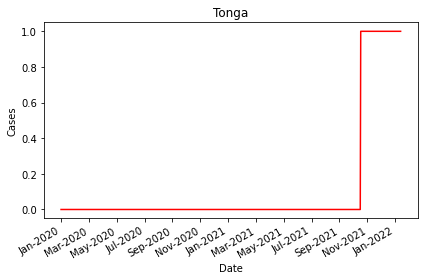

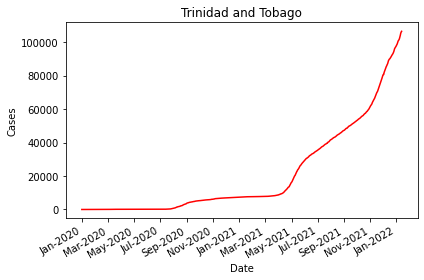

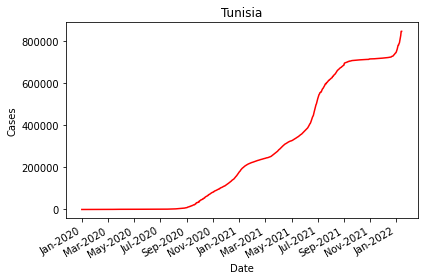

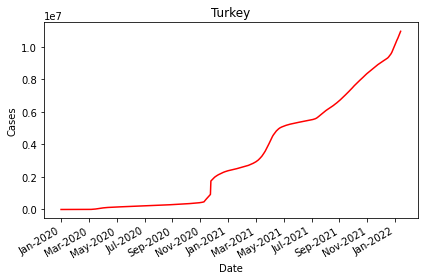

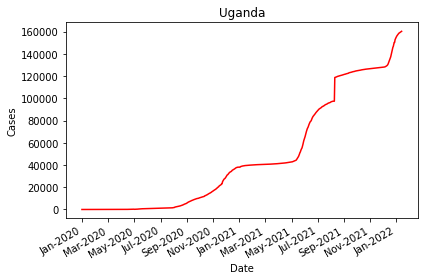

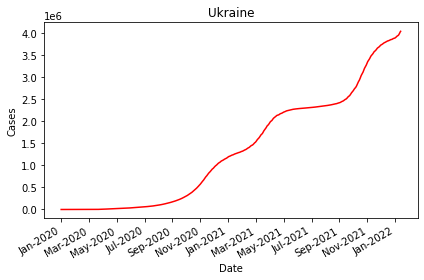

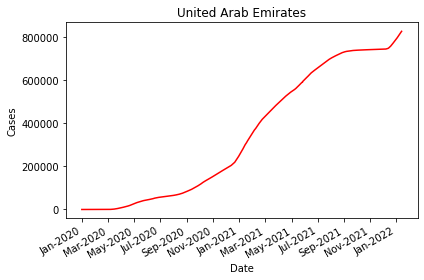

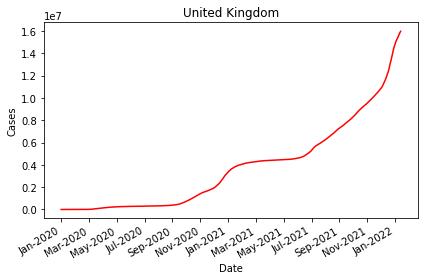

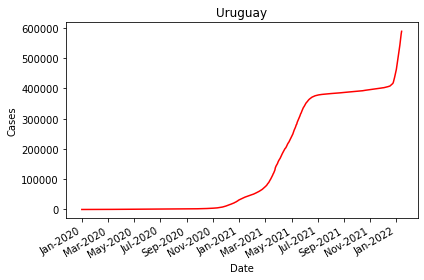

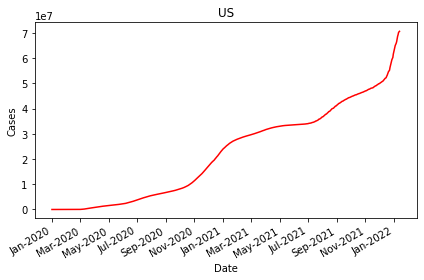

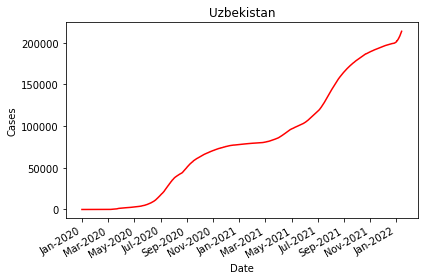

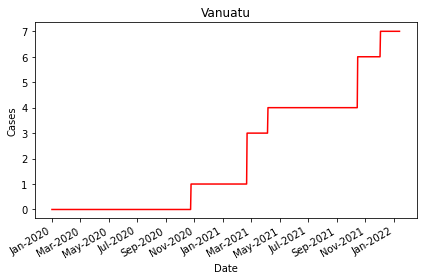

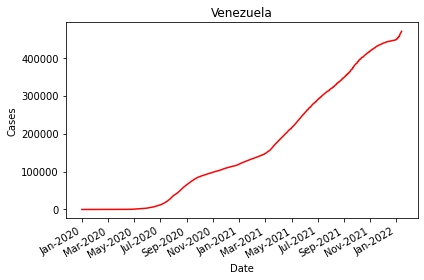

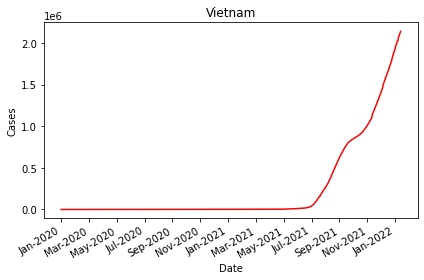

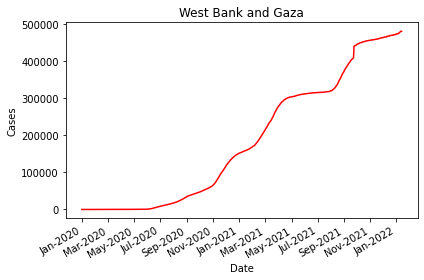

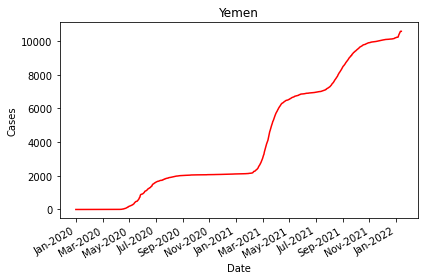

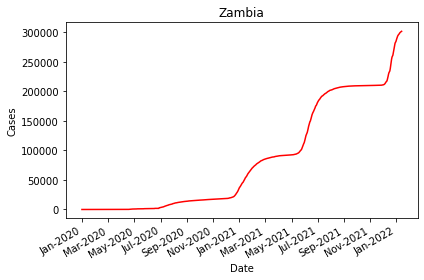

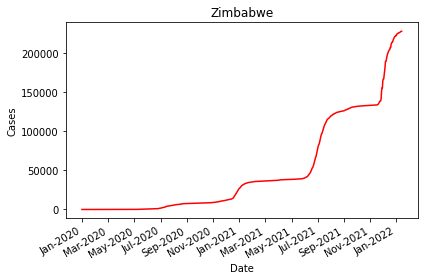

In [3]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as m_dates

def plot_time_series(df, country_list):
  datetime_col=[]
  col=[f for f in df.columns]
  for i in col:
    datetime_col.append(datetime.strptime(i, '%Y-%m-%d'))

  for j in country_list:
    y=df.loc[j]
    plt.plot(datetime_col, y, color='red', linestyle='solid')
    plt.xlabel('Date') 
    plt.ylabel('Cases')
    plt.title(j)
    plt.gcf().autofmt_xdate()
    format_date = m_dates.DateFormatter('%b-%Y')
    plt.gca().xaxis.set_major_formatter(format_date)
    plt.gca().xaxis.set_major_locator(m_dates.DayLocator(interval=60))
    plt.tight_layout()
    plt.show()

country_list=list(cases_raw.index)
plot_time_series(cases_raw, country_list)


In [4]:
# Standaradizing the data
from sklearn.preprocessing import StandardScaler
X = cases_raw.iloc[:,:].values
scal = StandardScaler()
X_std = scal.fit_transform(X)

# Mean and Standard Deviation
print("Mean value before Standaradizing the data:", X[:, 0].mean())
print("Standard Deviation value before Standaradizing the data:", X[:, 0].var())
print("Mean value after Standaradizing the data:", X_std[:, 0].mean())
print("Standard Deviation value after Standaradizing the data:", X_std[:, 0].var())

Mean value before Standaradizing the data: 2.8418367346938775
Standard Deviation value before Standaradizing the data: 1524.2045762182424
Mean value after Standaradizing the data: 1.8126090197961738e-17
Standard Deviation value after Standaradizing the data: 0.9999999999999999


In [5]:
# Converting Standaradized Data into Dataframe
col=[f for f in cases_raw.columns]
df = pd.DataFrame(X_std, columns = col)
df['country_list'] = country_list
df = df.set_index("country_list")
df.head()

2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  \
country_list                                                               
Afghanistan    -0.072791   -0.072953   -0.073252   -0.073043   -0.073102   
Albania        -0.072791   -0.072953   -0.073252   -0.073043   -0.073102   
Algeria        -0.072791   -0.072953   -0.073252   -0.073043   -0.073102   
Andorra        -0.072791   -0.072953   -0.073252   -0.073043   -0.073102   
Angola         -0.072791   -0.072953   -0.073252   -0.073043   -0.073102   

              2020-01-27  2020-01-28  2020-01-29  2020-01-30  2020-01-31  ...  \
country_list                                                              ...   
Afghanistan    -0.072862   -0.072513   -0.072557   -0.072442   -0.072529  ...   
Albania        -0.072862   -0.072513   -0.072557   -0.072442   -0.072529  ...   
Algeria        -0.072862   -0.072513   -0.072557   -0.072442   -0.072529  ...   
Andorra        -0.072862   -0.072513   -0.072557   -0.072442   -0.072529  ...   
Angola         -0.072862   -0.072513   -0.072557   -0.072442   -0.072529  ...   

              2022-01-14  2022-01-15  2022-01-16  2022-01-17  2022-01-18  \
country_list                                                               
Afghanistan    -0.254553   -0.254982   -0.255055   -0.255169   -0.254794   
Albania        -0.242599   -0.242745   -0.242623   -0.242692   -0.242044   
Algeria        -0.243246   -0.243669   -0.243729   -0.243844   -0.243513   
Andorra        -0.276497   -0.276791   -0.276722   -0.276669   -0.276027   
Angola         -0.265689   -0.266015   -0.265991   -0.265983   -0.265436   

              2022-01-19  2022-01-20  2022-01-21  2022-01-22  2022-01-23  
country_list                                                              
Afghanistan    -0.255016   -0.255453   -0.255624   -0.256252   -0.256926  
Albania        -0.242016   -0.242233   -0.242166   -0.242527   -0.243002  
Algeria        -0.243674   -0.244009   -0.244051   -0.244403   -0.244797  
Andorra        -0.275992   -0.275892   -0.275730   -0.276244   -0.276866  
Angola         -0.265455   -0.265758   -0.265772   -0.266309   -0.266857  

[5 rows x 733 columns]

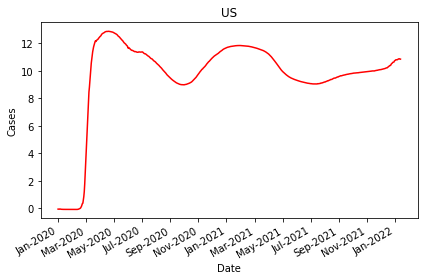

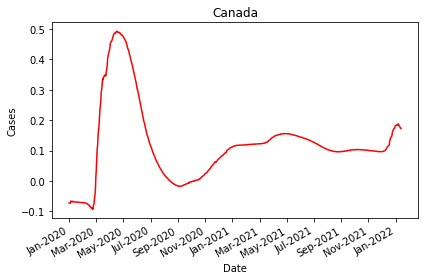

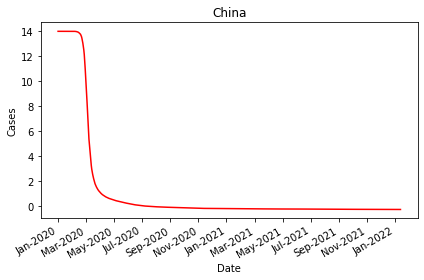

In [6]:
country = ['US', 'Canada', 'China']
plot_time_series(df, country)

**Answer part 1.4**: For the US the number of cases tends to increase rapidly from February to April and then it fluctuates between the values 8 and 12. For Canada, the number of cases tends to increase rapidly from February to April, and then it decreases to 0 and slightly increases to 0.2. For China, the graph starts at 14 and then it decreases exponentially to 0.

Since the data is standardized for each day, the time-series represents the number of cases for a country and compares it with the rest of the countries. Thus, if the curve increases the number of cases for a country is higher compared to the number of cases in other countries. If the number of cases for a country is lower compared to the other countries then the curve decreases.

The value 0 on the graph means the average value which is the average number of cases for all the countries. Positive values indicate the number of cases is higher than the average for the particular day and negative values indicate the number of cases is lower than the average for the particular day.

# Part 2: Applying PCA [3 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.5]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.5]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each componenet and a line to show cumulative --similar to tutoriual. Limit x-axis if needed to better see the plot). **[0.5]**
4. How many PCs do you need to cover 98% of the dataset's variance? **[0.5]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [7]:
import numpy as np
C = np.cov(df.T)   # Covariance matrix

def get_sorted_eigen(df_cov):
  eigenValues, eigenVectors = np.linalg.eigh(C)
  idx = (-eigenValues).argsort()
  eigenValues = eigenValues[idx]
  eigenVectors = eigenVectors[:, idx]
  return eigenValues, eigenVectors

eigenValues, eigenVectors = get_sorted_eigen(C)

In [8]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar
# expVar

array([ 85.47590445,  94.10558679,  98.08990311,  99.30079148,
        99.65862424,  99.8113032 ,  99.8744641 ,  99.91875382,
        99.94442571,  99.9666193 ,  99.97667849,  99.98351037,
        99.98804715,  99.9917002 ,  99.99399051,  99.99535537,
        99.9964488 ,  99.99718047,  99.99781163,  99.99825964,
        99.99865153,  99.99893343,  99.99917858,  99.99935209,
        99.99946151,  99.99954626,  99.99962391,  99.99968637,
        99.99973659,  99.99977844,  99.99981033,  99.9998396 ,
        99.99986021,  99.99987813,  99.99989412,  99.99990831,
        99.9999198 ,  99.99992963,  99.99993756,  99.99994412,
        99.99995051,  99.99995659,  99.99996145,  99.9999658 ,
        99.99996971,  99.99997289,  99.99997559,  99.9999778 ,
        99.99997996,  99.99998209,  99.99998389,  99.99998555,
        99.99998703,  99.99998821,  99.99998936,  99.99999034,
        99.99999128,  99.99999211,  99.99999275,  99.99999333,
        99.99999386,  99.99999435,  99.9999948 ,  99.99

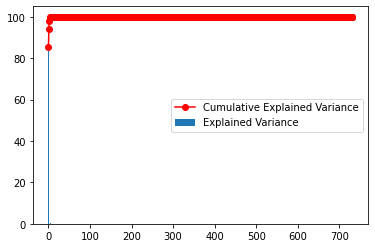

In [9]:
# Scree plot
plt.bar(range(733), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend(loc='center right')
plt.show()

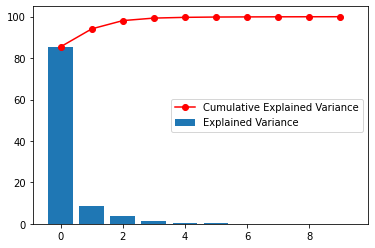

In [10]:
# Plotted for the first 10 Variance for better view of the plot
lst_expVar = []
lst_cumExpVar = []
for i in range(0,10):
  lst_expVar.append(expVar[i])
  lst_cumExpVar.append(cumExpVar[i])

plt.bar(range(10), lst_expVar, label='Explained Variance')
plt.plot(lst_cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend(loc='center right')
plt.show()

In [11]:
for i in lst_cumExpVar:
  if i>98:
    print("The number of PC's needed to cover 98% of the dataset's variance is:", lst_cumExpVar.index(i)+1)
    break

The number of PC's needed to cover 98% of the dataset's variance is: 3


**Answer Part 2. 4:**
We need 3 PC's to cover 98% of the dataset's variance.

In [12]:
eigenVectors[:,0]

array([7.59424602e-05, 6.57839673e-05, 9.16226464e-05, 7.02738521e-05,
       9.81652626e-05, 7.72711026e-05, 5.32161392e-05, 5.57863230e-05,
       4.95243825e-05, 5.34438166e-05, 4.90241148e-05, 4.33064472e-05,
       4.73686489e-05, 4.32585969e-05, 4.07639848e-05, 3.98922759e-05,
       3.71505236e-05, 3.69716138e-05, 3.61057650e-05, 3.40875424e-05,
       3.45000880e-05, 3.38094190e-05, 3.20526005e-05, 3.08368396e-05,
       2.99209991e-05, 2.89757984e-05, 2.78613406e-05, 2.68614841e-05,
       2.61373386e-05, 2.56400730e-05, 2.67642364e-05, 2.69580624e-05,
       2.94008187e-05, 3.11000672e-05, 3.47184904e-05, 3.95192670e-05,
       4.85674591e-05, 5.91037217e-05, 7.44015245e-05, 1.09490893e-04,
       1.47564675e-04, 1.93643044e-04, 2.54567324e-04, 3.40224560e-04,
       4.40955193e-04, 5.98492793e-04, 7.38097519e-04, 8.83061287e-04,
       1.07021547e-03, 1.38152752e-03, 1.68602467e-03, 2.27567183e-03,
       2.79794922e-03, 3.09597621e-03, 3.93270004e-03, 4.83548818e-03,
      

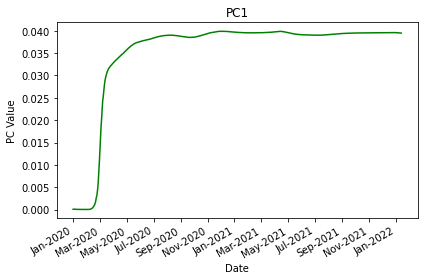

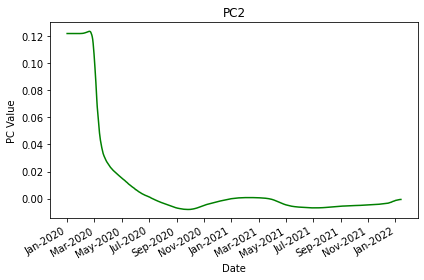

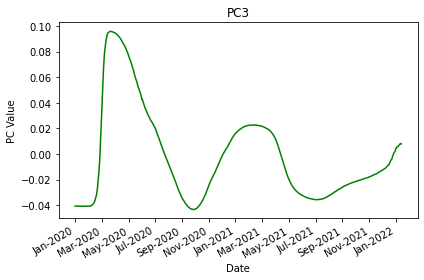

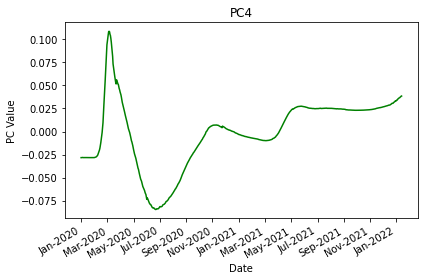

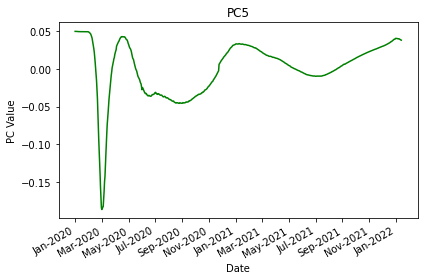

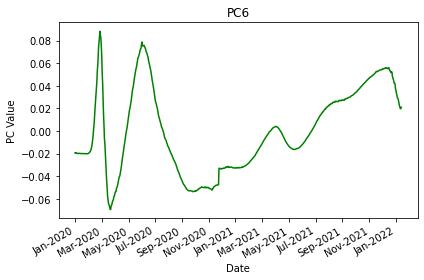

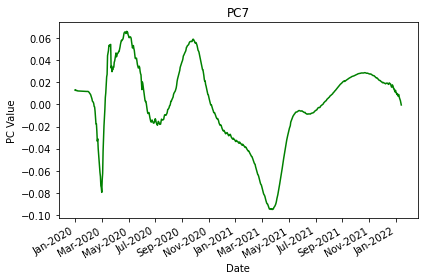

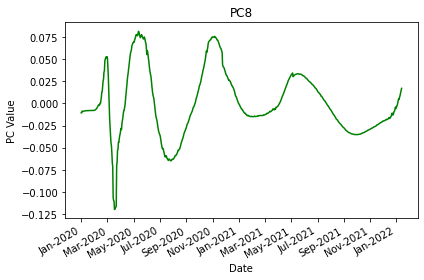

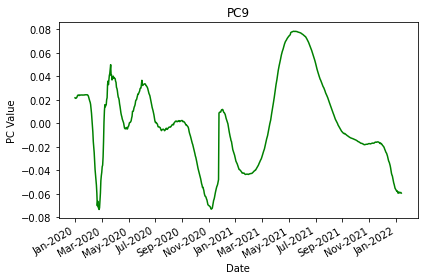

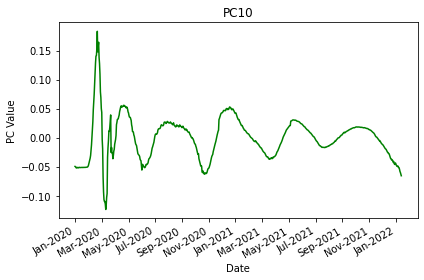

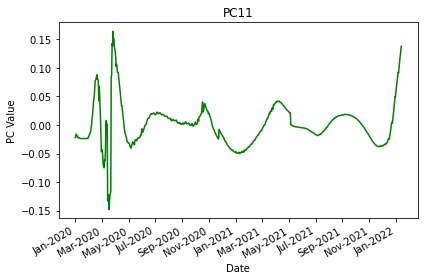

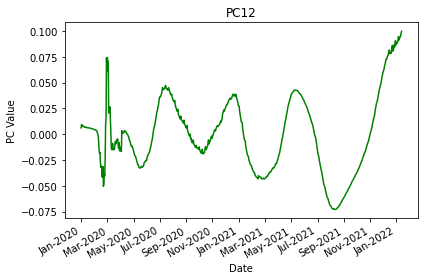

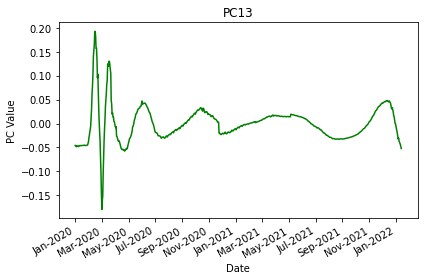

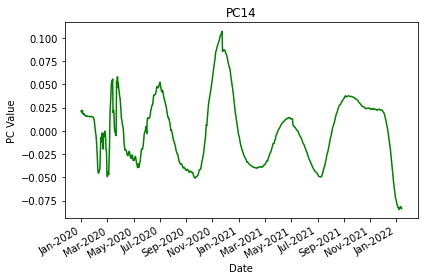

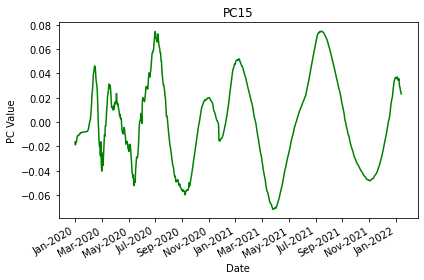

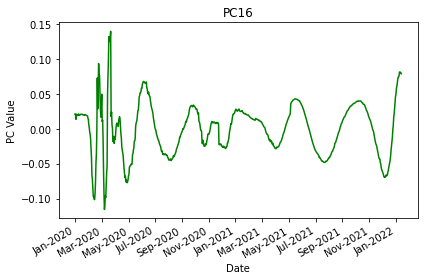

In [13]:
datetime_col=[]
for i in col:
  datetime_col.append(datetime.strptime(i, '%Y-%m-%d'))
for i in range(0,16):
  y=eigenVectors[:,i]
  plt.plot(datetime_col, y, color='green', linestyle='solid')
  plt.xlabel('Date') 
  plt.ylabel('PC Value')
  plt.title('PC{}'.format(i+1))
  plt.gcf().autofmt_xdate()
  format_date = m_dates.DateFormatter('%b-%Y')
  plt.gca().xaxis.set_major_formatter(format_date)
  plt.gca().xaxis.set_major_locator(m_dates.DayLocator(interval=60))
  plt.tight_layout()
  plt.show()

**Answer part 2.6**: The curve is smooth for the first few PC's, for the other PC's the curve has a larger variance. This is because the first few PC's represent general features and the rest of them has more variance as they indicate more detailed features in the dataset.

# Part 3: Data reconstruction [5 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[1]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[1]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 100 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[1]**


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
def plot_country_figures(original_df, country_name):
  # Plot 1
  country_name_lst = [country_name]
  plot_time_series(original_df, country_name_lst)   # original time-series for the specified country

  # Plot 2
  X = original_df.iloc[:,:].values
  scal = StandardScaler()
  X_std = scal.fit_transform(X)
  col=[f for f in original_df.columns]
  country_list=list(original_df.index)
  odf = pd.DataFrame(X_std, columns = col)
  odf['country_list'] = country_list
  odf = odf.set_index("country_list")
  covariance_odf = np.cov(odf.T)   # Covariance matrix
  eigenValues_odf, eigenVectors_odf = get_sorted_eigen(covariance_odf)
  datetime_col=[]
  for i in col:
    datetime_col.append(datetime.strptime(i, '%Y-%m-%d'))
  PC = [1, 2, 4, 8, 16]
  for i in PC:
    # Projection
    W = eigenVectors_odf[:, 0:i]
    proj_df = np.dot(odf, W)
    # Reconstruction
    Recon_df = np.dot(proj_df, W.T)
    X_std_inverse = scal.inverse_transform(Recon_df)
    Recon_odf = pd.DataFrame(X_std_inverse, columns = col)
    Recon_odf['country_list'] = country_list
    Recon_odf = Recon_odf.set_index("country_list")
    y = Recon_odf.loc[country_name]
    plt.plot(datetime_col, y, label = "PC{}".format(i), linestyle='solid')
  plt.legend(loc='best')
  plt.xlabel('Date') 
  plt.ylabel('Cases')
  plt.title('Reconstruction plot for {}'.format(country_name))
  plt.gcf().autofmt_xdate()
  format_date = m_dates.DateFormatter('%b-%Y')
  plt.gca().xaxis.set_major_formatter(format_date)
  plt.gca().xaxis.set_major_locator(m_dates.DayLocator(interval=60))
  plt.tight_layout()
  plt.show()

  # Plot 3
  W_best = eigenVectors_odf[:, 0:16]
  proj_best = np.dot(odf, W_best)
  Recon_best_Std = np.dot(proj_best, W_best.T)
  Recon_best_Std_inverse = scal.inverse_transform(Recon_best_Std)
  Recon_best = pd.DataFrame(Recon_best_Std_inverse, columns = col)
  Recon_best['country_list'] = country_list
  Recon_best = Recon_best.set_index("country_list")
  residual_error = original_df-Recon_best
  # print(residual_error)
  y = residual_error.loc[country_name]
  plt.plot(datetime_col, y, label = "PC{}".format(i), linestyle='solid')
  # plt.legend(loc='best')
  plt.xlabel('Date')
  plt.ylabel('Residual Error')
  plt.title('Residual Error for Best Reconstruction PC16 for {}'.format(country_name))
  plt.gcf().autofmt_xdate()
  format_date = m_dates.DateFormatter('%b-%Y')
  plt.gca().xaxis.set_major_formatter(format_date)
  plt.gca().xaxis.set_major_locator(m_dates.DayLocator(interval=60))
  plt.tight_layout()
  plt.show()

  # Plot 4
  rmse = []
  X_component = []
  for i in range(1,101):
    W_rmse = eigenVectors_odf[:, 0:i]
    proj_rmse = np.dot(odf, W_rmse)
    Recon_df_rmse = np.dot(proj_rmse, W_rmse.T)
    Recon_std_inverse_rmse = scal.inverse_transform(Recon_df_rmse)
    Recon_rmse = pd.DataFrame(Recon_std_inverse_rmse, columns = col)
    Recon_rmse['country_list'] = country_list
    Recon_rmse = Recon_rmse.set_index("country_list")
    mse = mean_squared_error(original_df.loc[country_name], Recon_rmse.loc[country_name])
    rmse.append(sqrt(mse))
    X_component.append(i)
  plt.plot(X_component, rmse, color='green', linestyle='solid')
  plt.xlabel('Number of Components')
  plt.ylabel('RMSE')
  plt.title('RMSE for {}'.format(country_name))

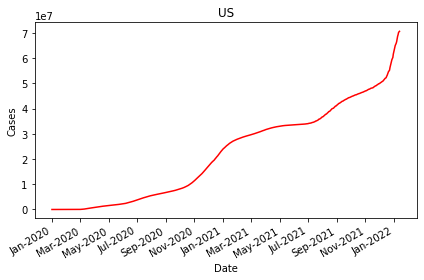

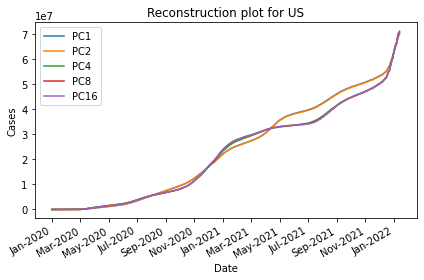

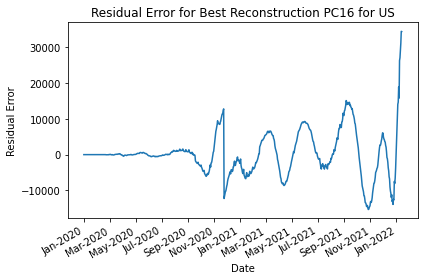

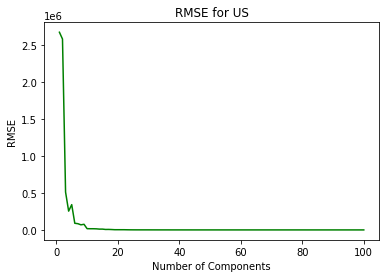

In [15]:
plot_country_figures(cases_raw, 'US')

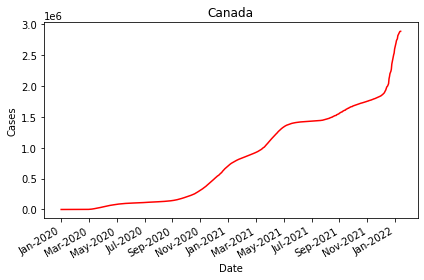

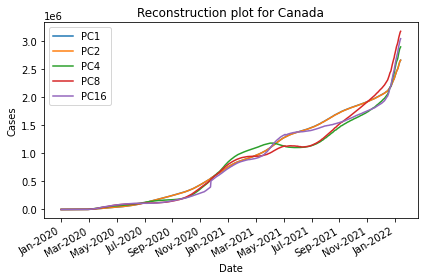

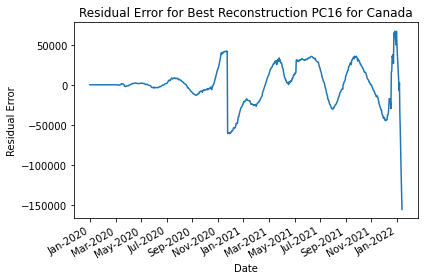

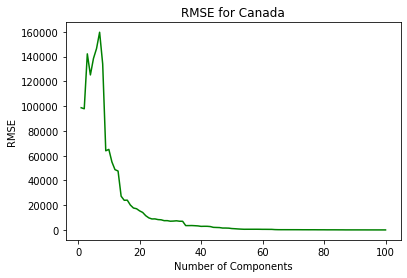

In [16]:
plot_country_figures(cases_raw, 'Canada')

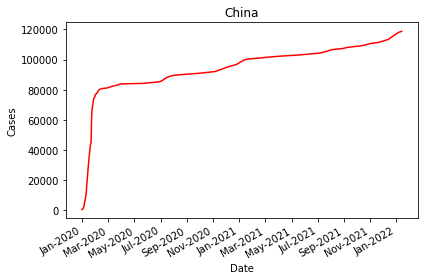

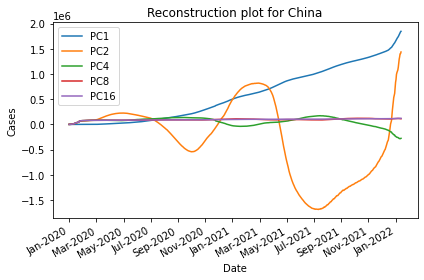

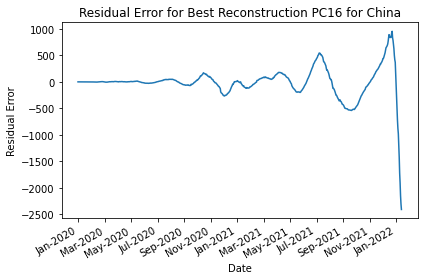

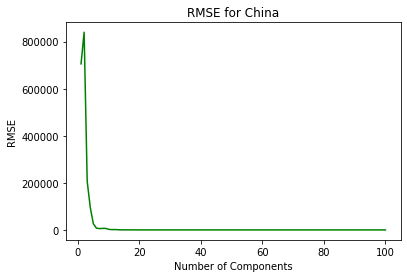

In [17]:
plot_country_figures(cases_raw, 'China')

# Part 4: Fashion-MNIST dataset [4 Marks]
Fashion-MNIST is a dataset for clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Create a new dataset by selecting images from *only* three categories (three distinct labels). 
    * To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. why? **[0.5]**
* Compute Eigenvectors and Eigenvalues. **[0.5]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.5]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ th principal components. **[1]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the items. **[0.5]**
* Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and thay can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[1]**
  * Hint: compare the dataset size with a case where we only use some principal components and projections.

**Answer Part 4.1:** PCA reduces the number of features in the data, while keeping most of the variance. With items that are similar in shape, the loss of data can be minimized as they will have common PC. If the items are different in shape, then it is difficult to find common PC as the data will have more variance.

In [18]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [19]:
x.shape

(1000, 784)

In [20]:
x

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1       0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    33.0   
4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

     pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1        0.0  ...     119.0     114.0     130.0      76.0       0.0       0.0   
2       22.0  ...       0.0       0.0       1.0       0.0       0.0       0.0   
3       96.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4        0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
..       ...  ...       ...       ...       ...       ...       ...       ...   
995      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
996      0.0  ...     178.0       0.0       0.0       3.0       0.0       0.0   
997     19.0  ...      26.0      13.0       2.0      24.0      31.0       0.0   
998      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
999      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

     pixel781  pixel782  pixel783  pixel784  
0         0.0       0.0       0.0       0.0  
1         0.0       0.0       0.0       0.0  
2         0.0       0.0       0.0       0.0  
3         0.0       0.0       0.0       0.0  
4         0.0       0.0       0.0       0.0  
..        ...       ...       ...       ...  
995       0.0       0.0       0.0       0.0  
996       0.0       0.0       0.0       0.0  
997       0.0       0.0       0.0       0.0  
998       0.0       0.0       0.0       0.0  
999       0.0       0.0       0.0       0.0  

[1000 rows x 784 columns]

In [21]:
y

0      9
1      0
2      0
3      3
4      0
      ..
995    7
996    3
997    3
998    9
999    8
Name: class, Length: 1000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Label is: Ankle boot


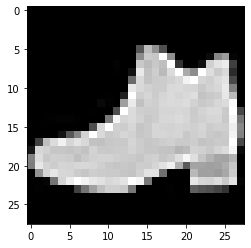

In [22]:
import matplotlib.pyplot as plt 
plt.gray() 
ind = 15
plt.imshow(x.loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

In [23]:
y.value_counts()

7    115
0    107
1    104
8    102
5    100
6    100
9     99
4     95
3     92
2     86
Name: class, dtype: int64

In [24]:
# Creating new dataframe with three categories 5,7,9 based on footwear
import pandas as pd
import numpy as np
x1 = x[y=='5']
x2 = x[y=='7']
x3 = x[y=='9']
a = [x1, x2, x3]
df_new = pd.concat(a)
df_new

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
8       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
13      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
30      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
946     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
962     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
971     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
990     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

     pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
8        0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
9        0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
12       0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
13       0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
30       0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
..       ...  ...       ...       ...       ...       ...       ...       ...   
946      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
962      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
971      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
990      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
998      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

     pixel781  pixel782  pixel783  pixel784  
8         0.0       0.0       0.0       0.0  
9         0.0       0.0       0.0       0.0  
12        0.0       0.0       0.0       0.0  
13        0.0       0.0       0.0       0.0  
30        0.0       0.0       0.0       0.0  
..        ...       ...       ...       ...  
946       0.0       0.0       0.0       0.0  
962       0.0       0.0       0.0       0.0  
971       0.0       0.0       0.0       0.0  
990       0.0       0.0       0.0       0.0  
998       0.0       0.0       0.0       0.0  

[314 rows x 784 columns]

In [25]:
# Eigenvectors and Eigenvalues
n, m = df_new.shape
mu = df_new.mean(axis=0)
df_new_mean = df_new - mu
if n>m:
  C = np.dot(df_new_mean.T,df_new_mean) / (n-1) # covariance matrix
  eigen_Values, eigen_Vectors = np.linalg.eigh(C)
else:
  C = np.dot(df_new_mean,df_new_mean.T) / (n-1) # covariance matrix
  eigen_Values, eigen_Vectors = np.linalg.eigh(C)
  eigen_Vectors = np.dot(df_new_mean.T, eigen_Vectors)
  for i in range(n):
    eigen_Vectors[:,i] = eigen_Vectors[:, i] / np.linalg.norm(eigen_Vectors[:, i])
idx = (-eigen_Values).argsort()
eigen_Values = eigen_Values[idx]
eigen_Vectors = eigen_Vectors[:, idx]
print("eigen values shape:", eigen_Values.shape)
print("eigen vectors shape:", eigen_Vectors.shape)

for idx, cumulativeSum in enumerate(np.cumsum(eigen_Values) / np.sum(eigen_Values)):
  if cumulativeSum > 0.98:
    num_basis = idx
    break
print("The number of PC's needed to cover 98% of the dataset's variance is:", num_basis+1)

eigen values shape: (314,)
eigen vectors shape: (784, 314)
The number of PC's needed to cover 98% of the dataset's variance is: 149


In [26]:
eigen_Values

array([9.94502271e+05, 4.23714504e+05, 2.31504353e+05, 1.01607693e+05,
       7.78999533e+04, 6.74173519e+04, 5.82785710e+04, 5.31785028e+04,
       4.83803304e+04, 4.54404629e+04, 3.78652716e+04, 3.50239454e+04,
       3.21434036e+04, 3.09264818e+04, 2.64917299e+04, 2.46023424e+04,
       2.42488211e+04, 2.29105294e+04, 2.21916359e+04, 1.87337907e+04,
       1.79238607e+04, 1.69938314e+04, 1.61299761e+04, 1.57365870e+04,
       1.56727762e+04, 1.52362847e+04, 1.42120573e+04, 1.34481604e+04,
       1.31448395e+04, 1.27864031e+04, 1.22395978e+04, 1.18095566e+04,
       1.14532198e+04, 1.12232614e+04, 1.04761575e+04, 1.00078204e+04,
       9.81298935e+03, 9.61390886e+03, 9.33037924e+03, 9.11476468e+03,
       9.06521447e+03, 8.71439438e+03, 8.38151653e+03, 8.32600384e+03,
       8.09903245e+03, 8.03262258e+03, 7.57239010e+03, 7.38998655e+03,
       7.08383910e+03, 6.94039197e+03, 6.73839305e+03, 6.61468277e+03,
       6.32111430e+03, 6.13499225e+03, 5.90691725e+03, 5.87402497e+03,
      

In [27]:
eigen_Vectors

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.47089718e-03,  9.06200458e-03,  1.04921456e-02, ...,
        -1.78164701e-02, -2.73490926e-02,  6.61992575e-03],
       [-1.61480146e-04,  1.82378937e-03,  3.61160811e-04, ...,
        -1.05746896e-03, -6.04284548e-03, -6.29780232e-03],
       [ 5.87913204e-06,  4.14080046e-06,  1.14739672e-05, ...,
         9.77160383e-05,  1.56206160e-04,  1.54129791e-04]])

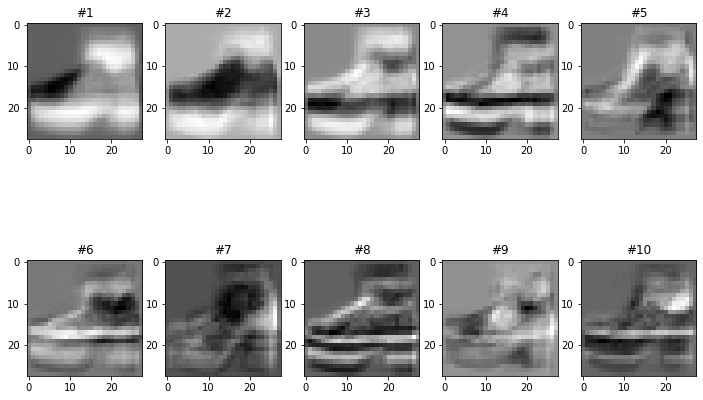

In [28]:
# Plot for first 10 eigenvectors 
count = 10
rows = np.ceil(count/5)
fig = plt.figure(figsize=(12, rows * 4))
for i in range(0, count):
    plt.subplot(rows, 5, i+1)
    plt.imshow(eigen_Vectors[:, i].reshape(-1, 28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

The first few eigenvectors represent the common features like the shape of different parts and the rest of them represent more detailed features.

In [29]:
def projection(W , X , mu):
    return np.dot(X - mu , W)
def reconstruction(W , Y , mu) :
    return np.dot(Y , W.T) + mu
def reconstruct_PC(n, df, idx, eigen_Vectors): 
  P = projection(eigen_Vectors[:, 0:n], df.iloc[idx].values, df.mean(axis=0))
  R = reconstruction(eigen_Vectors[:, 0:n], P, df.mean(axis=0))
  plt.imshow(R.values.reshape(-1,28), cmap = plt.cm.gray)

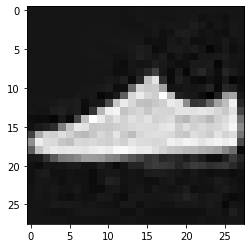

In [30]:
n=150
idx_df_new = np.random.randint(0, df.shape[0]-1)
reconstruct_PC(n, df_new, idx_df_new, eigen_Vectors)

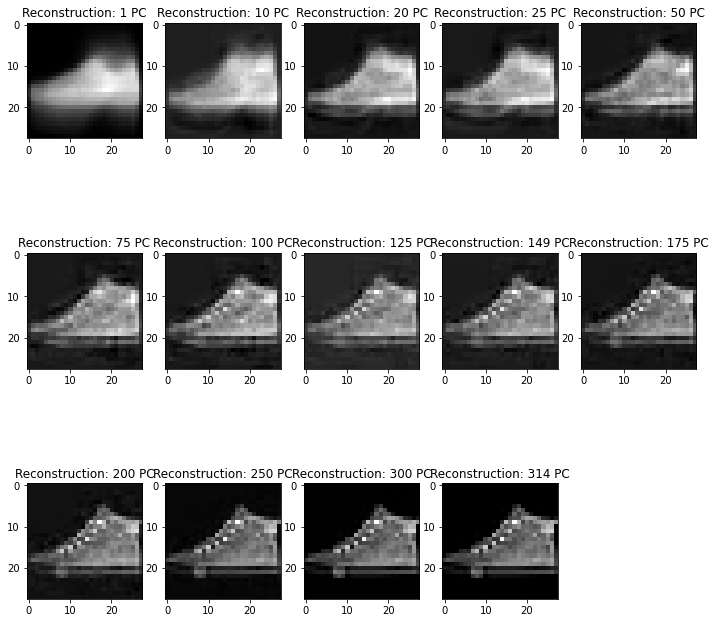

In [31]:
# Running the function a few times to determine how many components are required so that we (humans!) can identify the items
# 1
n_Set = [1, 10 , 20, 25, 50, 75, 100, 125, 149, 175, 200, 250, 300, 314]
count = len(n_Set)
rows = np.ceil(count/5)
fig = plt.figure(figsize=(12, rows * 4))
idx_df_new = np.random.randint(0, df.shape[0]-1)
for i in range(0, count):
    plt.subplot(rows, 5, i+1)
    reconstruct_PC(n_Set[i], df_new, idx_df_new, eigen_Vectors)
    plt.title('Reconstruction: {} PC'.format(n_Set[i]))

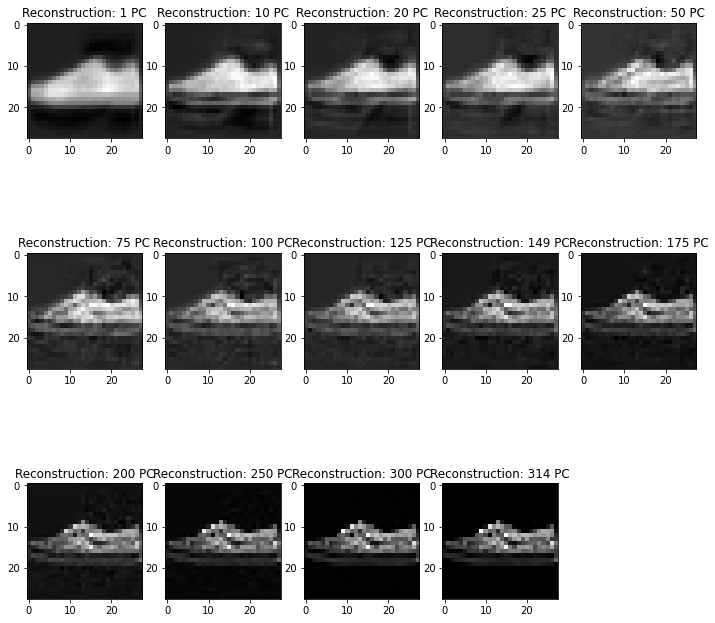

In [32]:
# Running the function a few times to determine how many components are required so that we (humans!) can identify the items
# 2
n_Set = [1, 10 , 20, 25, 50, 75, 100, 125, 149, 175, 200, 250, 300, 314]
count = len(n_Set)
rows = np.ceil(count/5)
fig = plt.figure(figsize=(12, rows * 4))
idx_df_new = np.random.randint(0, df.shape[0]-1)
for i in range(0, count):
    plt.subplot(rows, 5, i+1)
    reconstruct_PC(n_Set[i], df_new, idx_df_new, eigen_Vectors)
    plt.title('Reconstruction: {} PC'.format(n_Set[i]))

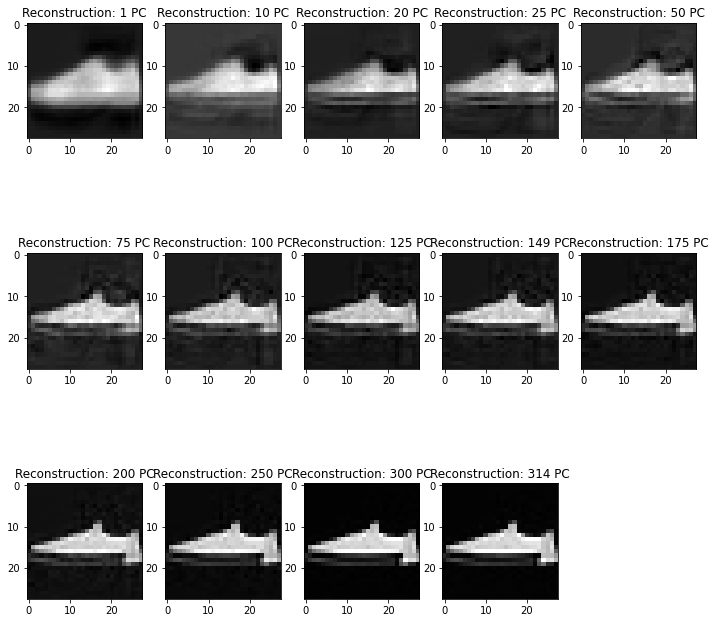

In [33]:
# Running the function a few times to determine how many components are required so that we (humans!) can identify the items
# 3
n_Set = [1, 10 , 20, 25, 50, 75, 100, 125, 149, 175, 200, 250, 300, 314]
count = len(n_Set)
rows = np.ceil(count/5)
fig = plt.figure(figsize=(12, rows * 4))
idx_df_new = np.random.randint(0, df.shape[0]-1)
for i in range(0, count):
    plt.subplot(rows, 5, i+1)
    reconstruct_PC(n_Set[i], df_new, idx_df_new, eigen_Vectors)
    plt.title('Reconstruction: {} PC'.format(n_Set[i]))

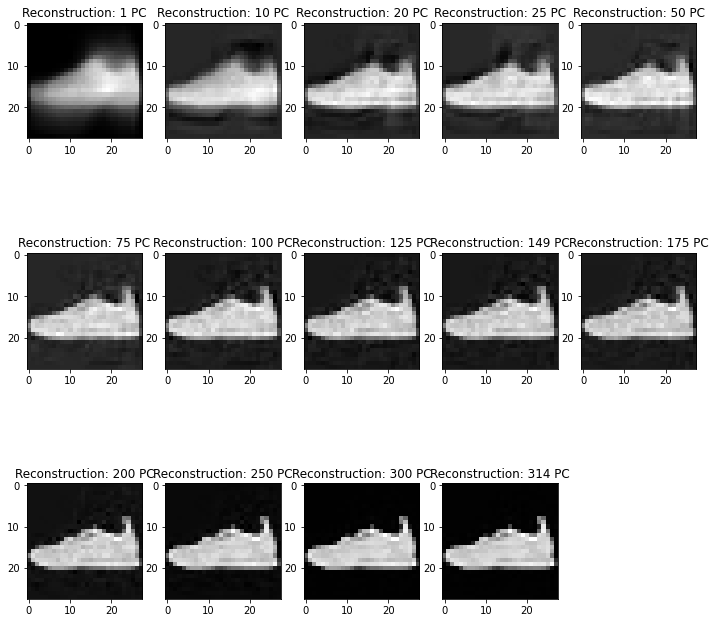

In [34]:
# Running the function a few times to determine how many components are required so that we (humans!) can identify the items
# 4
n_Set = [1, 10 , 20, 25, 50, 75, 100, 125, 149, 175, 200, 250, 300, 314]
count = len(n_Set)
rows = np.ceil(count/5)
fig = plt.figure(figsize=(12, rows * 4))
idx_df_new = np.random.randint(0, df.shape[0]-1)
for i in range(0, count):
    plt.subplot(rows, 5, i+1)
    reconstruct_PC(n_Set[i], df_new, idx_df_new, eigen_Vectors)
    plt.title('Reconstruction: {} PC'.format(n_Set[i]))

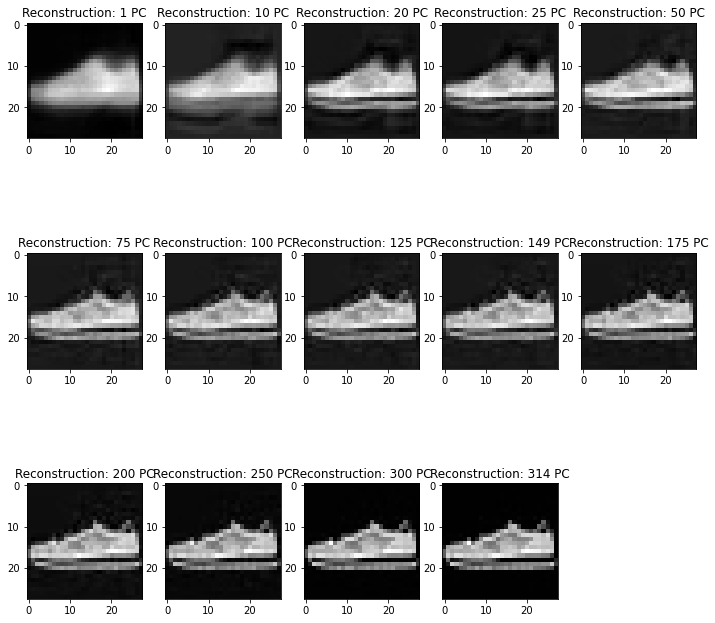

In [35]:
# Running the function a few times to determine how many components are required so that we (humans!) can identify the items
# 5
n_Set = [1, 10 , 20, 25, 50, 75, 100, 125, 149, 175, 200, 250, 300, 314]
count = len(n_Set)
rows = np.ceil(count/5)
fig = plt.figure(figsize=(12, rows * 4))
idx_df_new = np.random.randint(0, df.shape[0]-1)
for i in range(0, count):
    plt.subplot(rows, 5, i+1)
    reconstruct_PC(n_Set[i], df_new, idx_df_new, eigen_Vectors)
    plt.title('Reconstruction: {} PC'.format(n_Set[i]))

Based on the plots above, the number of components required so that we (humans!) can identify the items is **100**.

In [36]:
# Part 4.6
# Eigenvectors and Eigenvalues
n, m = x.shape
mu = x.mean(axis=0)
x_mean = x - mu
if n>m:
  C = np.dot(x_mean.T,x_mean) / (n-1) # covariance matrix
  eigen_Values_l, eigen_Vectors_l = np.linalg.eigh(C)
else:
  C = np.dot(x_mean,x_mean.T) / (n-1) # covariance matrix
  eigen_Values_l, eigen_Vectors_l = np.linalg.eigh(C)
  eigen_Vectors_l = np.dot(x_mean.T, eigen_Vectors_l)
  for i in range(n):
    eigen_Vectors_l[:,i] = eigen_Vectors_l[:, i] / np.linalg.norm(eigen_Vectors_l[:, i])
idx = (-eigen_Values_l).argsort()
eigen_Values_l = eigen_Values_l[idx]
eigen_Vectors_l = eigen_Vectors_l[:, idx]
print("Eigenvalues shape:", eigen_Values_l.shape)
print("Eigenvectors shape:", eigen_Vectors_l.shape)

for idx, cumulativeSum in enumerate(np.cumsum(eigen_Values_l) / np.sum(eigen_Values_l)):
  if cumulativeSum > 0.98:
    num_basis = idx
    break
print("The number of PC's needed to cover 98% of the dataset's variance is:", num_basis+1)

Eigenvalues shape: (784,)
Eigenvectors shape: (784, 784)
The number of PC's needed to cover 98% of the dataset's variance is: 246


In [37]:
# Based on the number of components found in the last step
n=100
# Projection
W = eigen_Vectors_l[:, 0:n]
print("The required Eigenvectors shape:", W.shape)
proj = np.dot(x_mean, W)
print("Projection shape:", proj.shape)
# Reconstruction
Recon = np.dot(proj, W.T)
print("Reconstruction shape:", Recon.shape)
k, l = x.shape
total_element = k*l
print("Total number of elements:", total_element)
a, b = W.shape
n, m = proj.shape
element = (a*b)+(n*m)
print("Total number of elements after summerizing the data:", element)
compression_ratio = total_element/element
print("Compression ratio:", compression_ratio)

The required Eigenvectors shape: (784, 100)
Projection shape: (1000, 100)
Reconstruction shape: (1000, 784)
Total number of elements: 784000
Total number of elements after summerizing the data: 178400
Compression ratio: 4.394618834080718


# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

